In [1]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2024_Garcia-Bonilla_et_al/22_03_25"

In [2]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2024_Garcia-Bonilla_et_al/22_03_25"

In [3]:
.libPaths()

[1] "/fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3"               
[2] "/gnu/store/asn7yfxccx9hqi4afrnw685xw6c6382z-profile/site-library"         
[3] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [4]:
my_seurat_extend_with_domc_package <- 
    "/home/ykazci/.guix-extra-profiles/seurat_extend_w_DOMC/seurat_extend_w_DOMC/site-library"

In [5]:
.libPaths(new = my_seurat_extend_with_domc_package, 
          include.site = FALSE)

In [6]:
.libPaths()

[1] "/gnu/store/3cgldbp12ywyck7dn7h3p1rx5qh2c9dy-profile/site-library"         
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [7]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




In [8]:
library(SeuratExtend)

Loading required package: SeuratExtendData



In [9]:
GBonilla_seurat <-  
    readRDS(here::here('r_objects', 'GBonilla_seurat_w_Regulons.RDS'))

In [10]:
# Setting the default assay to "TF" for easier access to regulon activity
DefaultAssay(GBonilla_seurat) <- "TF"

In [11]:
library(magrittr)

In [12]:
GBonilla_seurat %>% levels()

[1] "epithelial-like cells"         "granulocytes"                 
 [3] "Border-associated macrophages" "myeloid-derived cells"        
 [5] "dendritic cells"               "Vascular Mural Cells"         
 [7] "Endothelial cells"             "microglia"                    
 [9] "oligodendrocytes"              "natural killer cells"         
[11] "B cells"                       "T cells"                      
[13] "mast cells"

In [13]:
GBonilla_seurat$treatment_and_cell_types %>% unique()

[1] "Sham_epithelial-like cells"         "Sham_granulocytes"                 
 [3] "Sham_Border-associated macrophages" "Sham_myeloid-derived cells"        
 [5] "Sham_dendritic cells"               "Sham_Vascular Mural Cells"         
 [7] "Sham_Endothelial cells"             "Sham_microglia"                    
 [9] "Sham_oligodendrocytes"              "Sham_natural killer cells"         
[11] "Sham_B cells"                       "Sham_T cells"                      
[13] "Sham_mast cells"                    "D02_microglia"                     
[15] "D02_myeloid-derived cells"          "D02_Endothelial cells"             
[17] "D02_oligodendrocytes"               "D02_T cells"                       
[19] "D02_dendritic cells"                "D02_Border-associated macrophages" 
[21] "D02_natural killer cells"           "D02_B cells"                       
[23] "D02_granulocytes"                   "D02_mast cells"                    
[25] "D02_epithelial-like cells"          "D02_Vascular Mural Cells"          
[27] "D14_myeloid-derived cells"          "D14_microglia"                     
[29] "D14_oligodendrocytes"               "D14_dendritic cells"               
[31] "D14_Endothelial cells"              "D14_epithelial-like cells"         
[33] "D14_Border-associated macrophages"  "D14_Vascular Mural Cells"          
[35] "D14_T cells"                        "D14_natural killer cells"          
[37] "D14_B cells"                        "D14_granulocytes"                  
[39] "D14_mast cells"

In [14]:
GBonilla_seurat$treatment_and_cell_types %>% 
table() %>% 
as.data.frame() %>% 
tidyr::pivot_wider(names_from = "." , values_from = Freq) %>% 
.[,1:20]

D02_B cells,D02_Border-associated macrophages,D02_Endothelial cells,D02_T cells,D02_Vascular Mural Cells,D02_dendritic cells,D02_epithelial-like cells,D02_granulocytes,D02_mast cells,D02_microglia,D02_myeloid-derived cells,D02_natural killer cells,D02_oligodendrocytes,D14_B cells,D14_Border-associated macrophages,D14_Endothelial cells,D14_T cells,D14_Vascular Mural Cells,D14_dendritic cells,D14_epithelial-like cells
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
70,357,2491,215,35,1282,7,350,8,2693,7225,73,17,141,214,1610,853,27,1712,24


In [15]:
Idents(GBonilla_seurat) <- 'treatment_and_cell_types'

In [16]:
# default axis font size: 

my_theme <- ggplot2::theme(
    axis.title.x = ggplot2::element_text(size = 14),  # X-axis title size
    axis.title.y = ggplot2::element_text(size = 14),  # Y-axis title size
    axis.text.x  = ggplot2::element_text(size = 14, angle = 45, hjust = 1),  # X-axis tick labels
    axis.text.y  = ggplot2::element_text(size = 14),  # Y-axis tick labels
    legend.text  = ggplot2::element_text(size = 15)   # Legend text size
)

my_margin <- ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 1), "cm"))  # Add margin to top, right, bottom, and left margins, respectively.



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'tidyr'


The following object is masked from 'package:magrittr':

    extract


Warning message in WaterfallPlot.default(matr = t(Std.matr$matr), f = Std.matr$f, :
"strings not representable in native encoding will be translated to UTF-8"
Loading required package: viridis

Loading required package: viridisLite


Attaching package: 'viridis'


The following object is masked from 'package:scales':

    viridis_pal




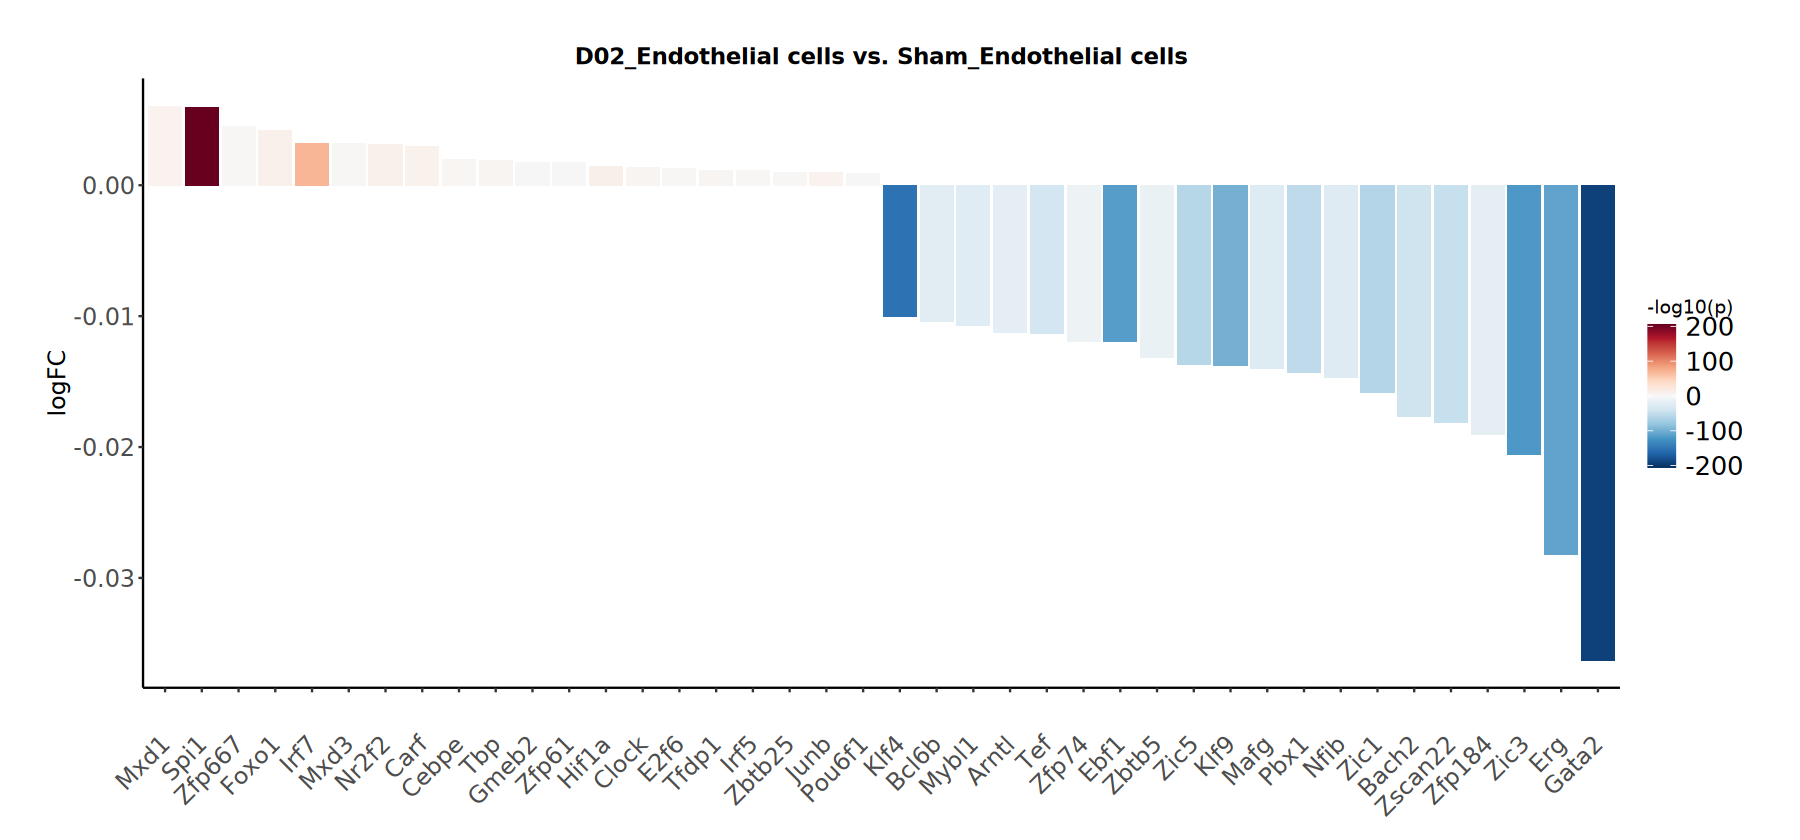

In [17]:
options(repr.plot.width = 15, repr.plot.height = 7) 

# Creating a waterfall plot to compare regulon activity between monocytes and CD8 T cells
WaterfallPlot(
  GBonilla_seurat,
  features = rownames(GBonilla_seurat),  # Using all available TFs in the "TF" assay
  ident.1 = "D02_Endothelial cells",      # First group of cells
  ident.2 = "Sham_Endothelial cells",     # Second group of cells
  exp.transform = FALSE,      # Disable transformation of expression data
  top.n = 20                  # Display the top 20 most differentially active TFs
) + my_theme + my_margin

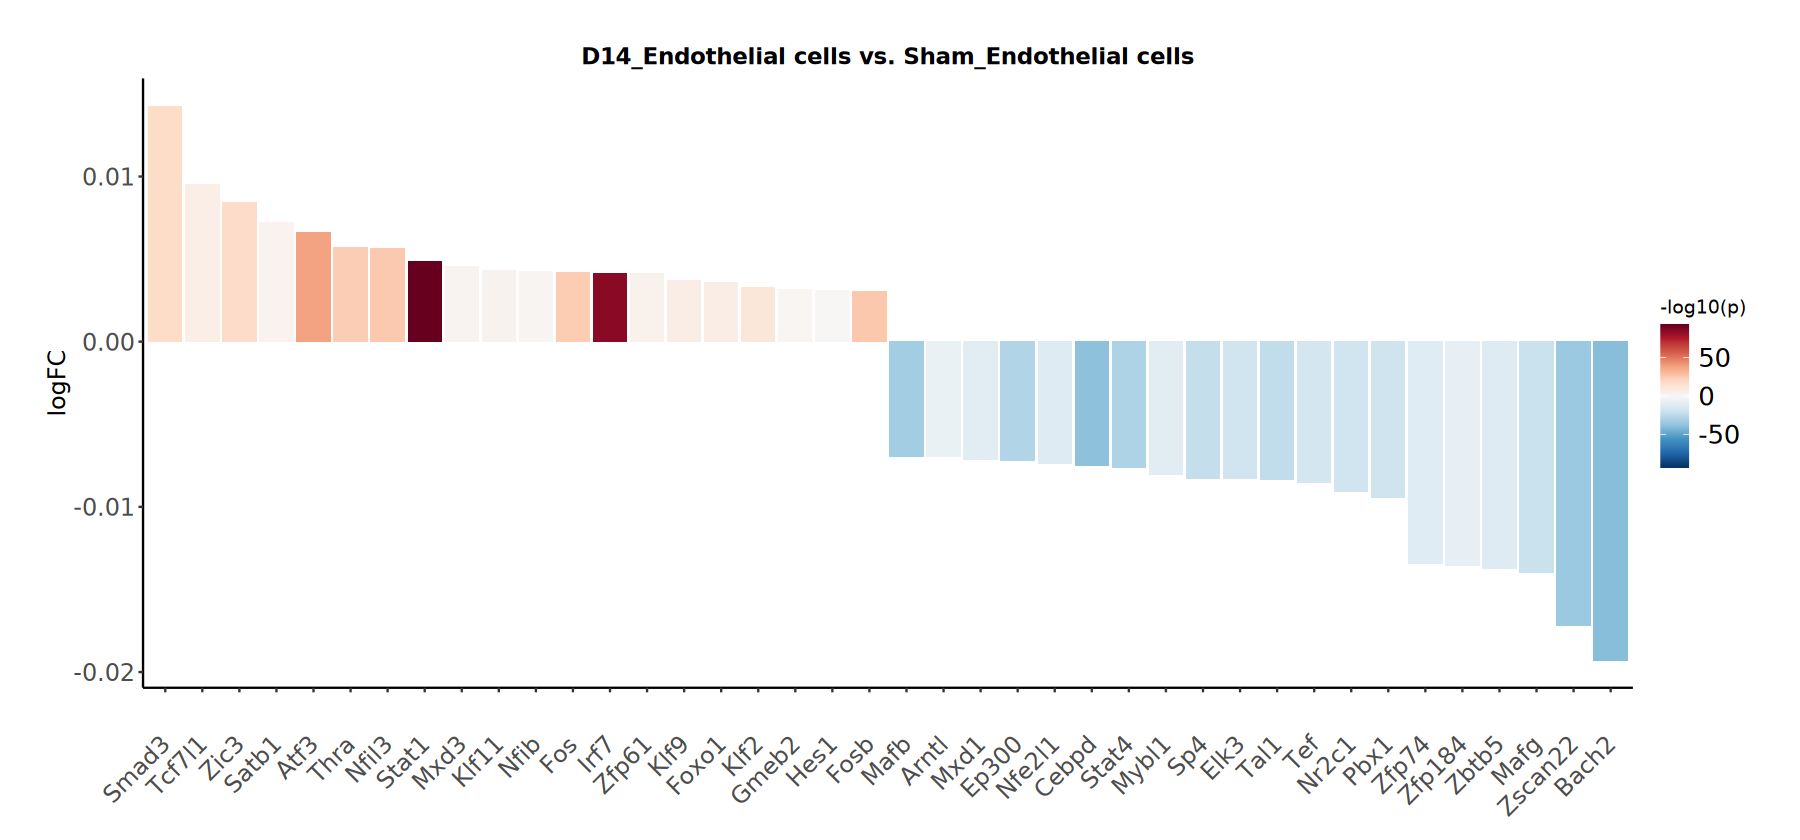

In [18]:
options(repr.plot.width = 15, repr.plot.height = 7) 

# Creating a waterfall plot to compare regulon activity between monocytes and CD8 T cells
WaterfallPlot(
  GBonilla_seurat,
  features = rownames(GBonilla_seurat),  # Using all available TFs in the "TF" assay
  ident.1 = "D14_Endothelial cells",      # First group of cells
  ident.2 = "Sham_Endothelial cells",     # Second group of cells
  exp.transform = FALSE,      # Disable transformation of expression data
  top.n = 20                  # Display the top 20 most differentially active TFs
) + my_theme + my_margin

In [19]:
# Viewing the outputs
tf_auc <- GBonilla_seurat@misc$SCENIC$RegulonsAUC
head(tf_auc, 4:5)

,Ahr,Arid3a,Arntl,Atf1,Atf3
BRS02R1GGGATCGATATG,0.023081447,0.026144271,0.00000000,0.023973053,0.01802486
BRS02R1ATTCAATATCAC,0.030983534,0.009139469,0.04393093,0.023595136,0.05270828
BRS02R1ATTTCCGTCCGC,0.007130256,0.011320200,0.02234637,0.003861321,0.10247146
BRS02R1TAGCGCGAGACC,0.006652455,0.000000000,0.00000000,0.008971410,0.02766982


In [20]:
tf_zscore <- CalcStats(tf_auc, f = GBonilla_seurat$treatment_and_cell_types, order = "p", n = 5, t = TRUE)

Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: 'mosaic'


The following object is masked from 'package:Matrix':

    mean


The following object is masked from 'package:scales':

    rescale


The following object is masked from 'package:ggplot2':

    stat


The following objects are masked from 'package:dplyr':

    count, do, tally


The following objects are masked from 'package:stats':

    IQR, binom.test, cor, cor.test, cov, fivenum, median, prop.test,
    quantile, sd, t.test, var


The following objects are masked from 'package:base':

    max, mean, min, prod, range, sample, sum





Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths



Attaching package: 'rlang'


The following object is masked from 'package:magrittr':

    set_names


Using id as id variables



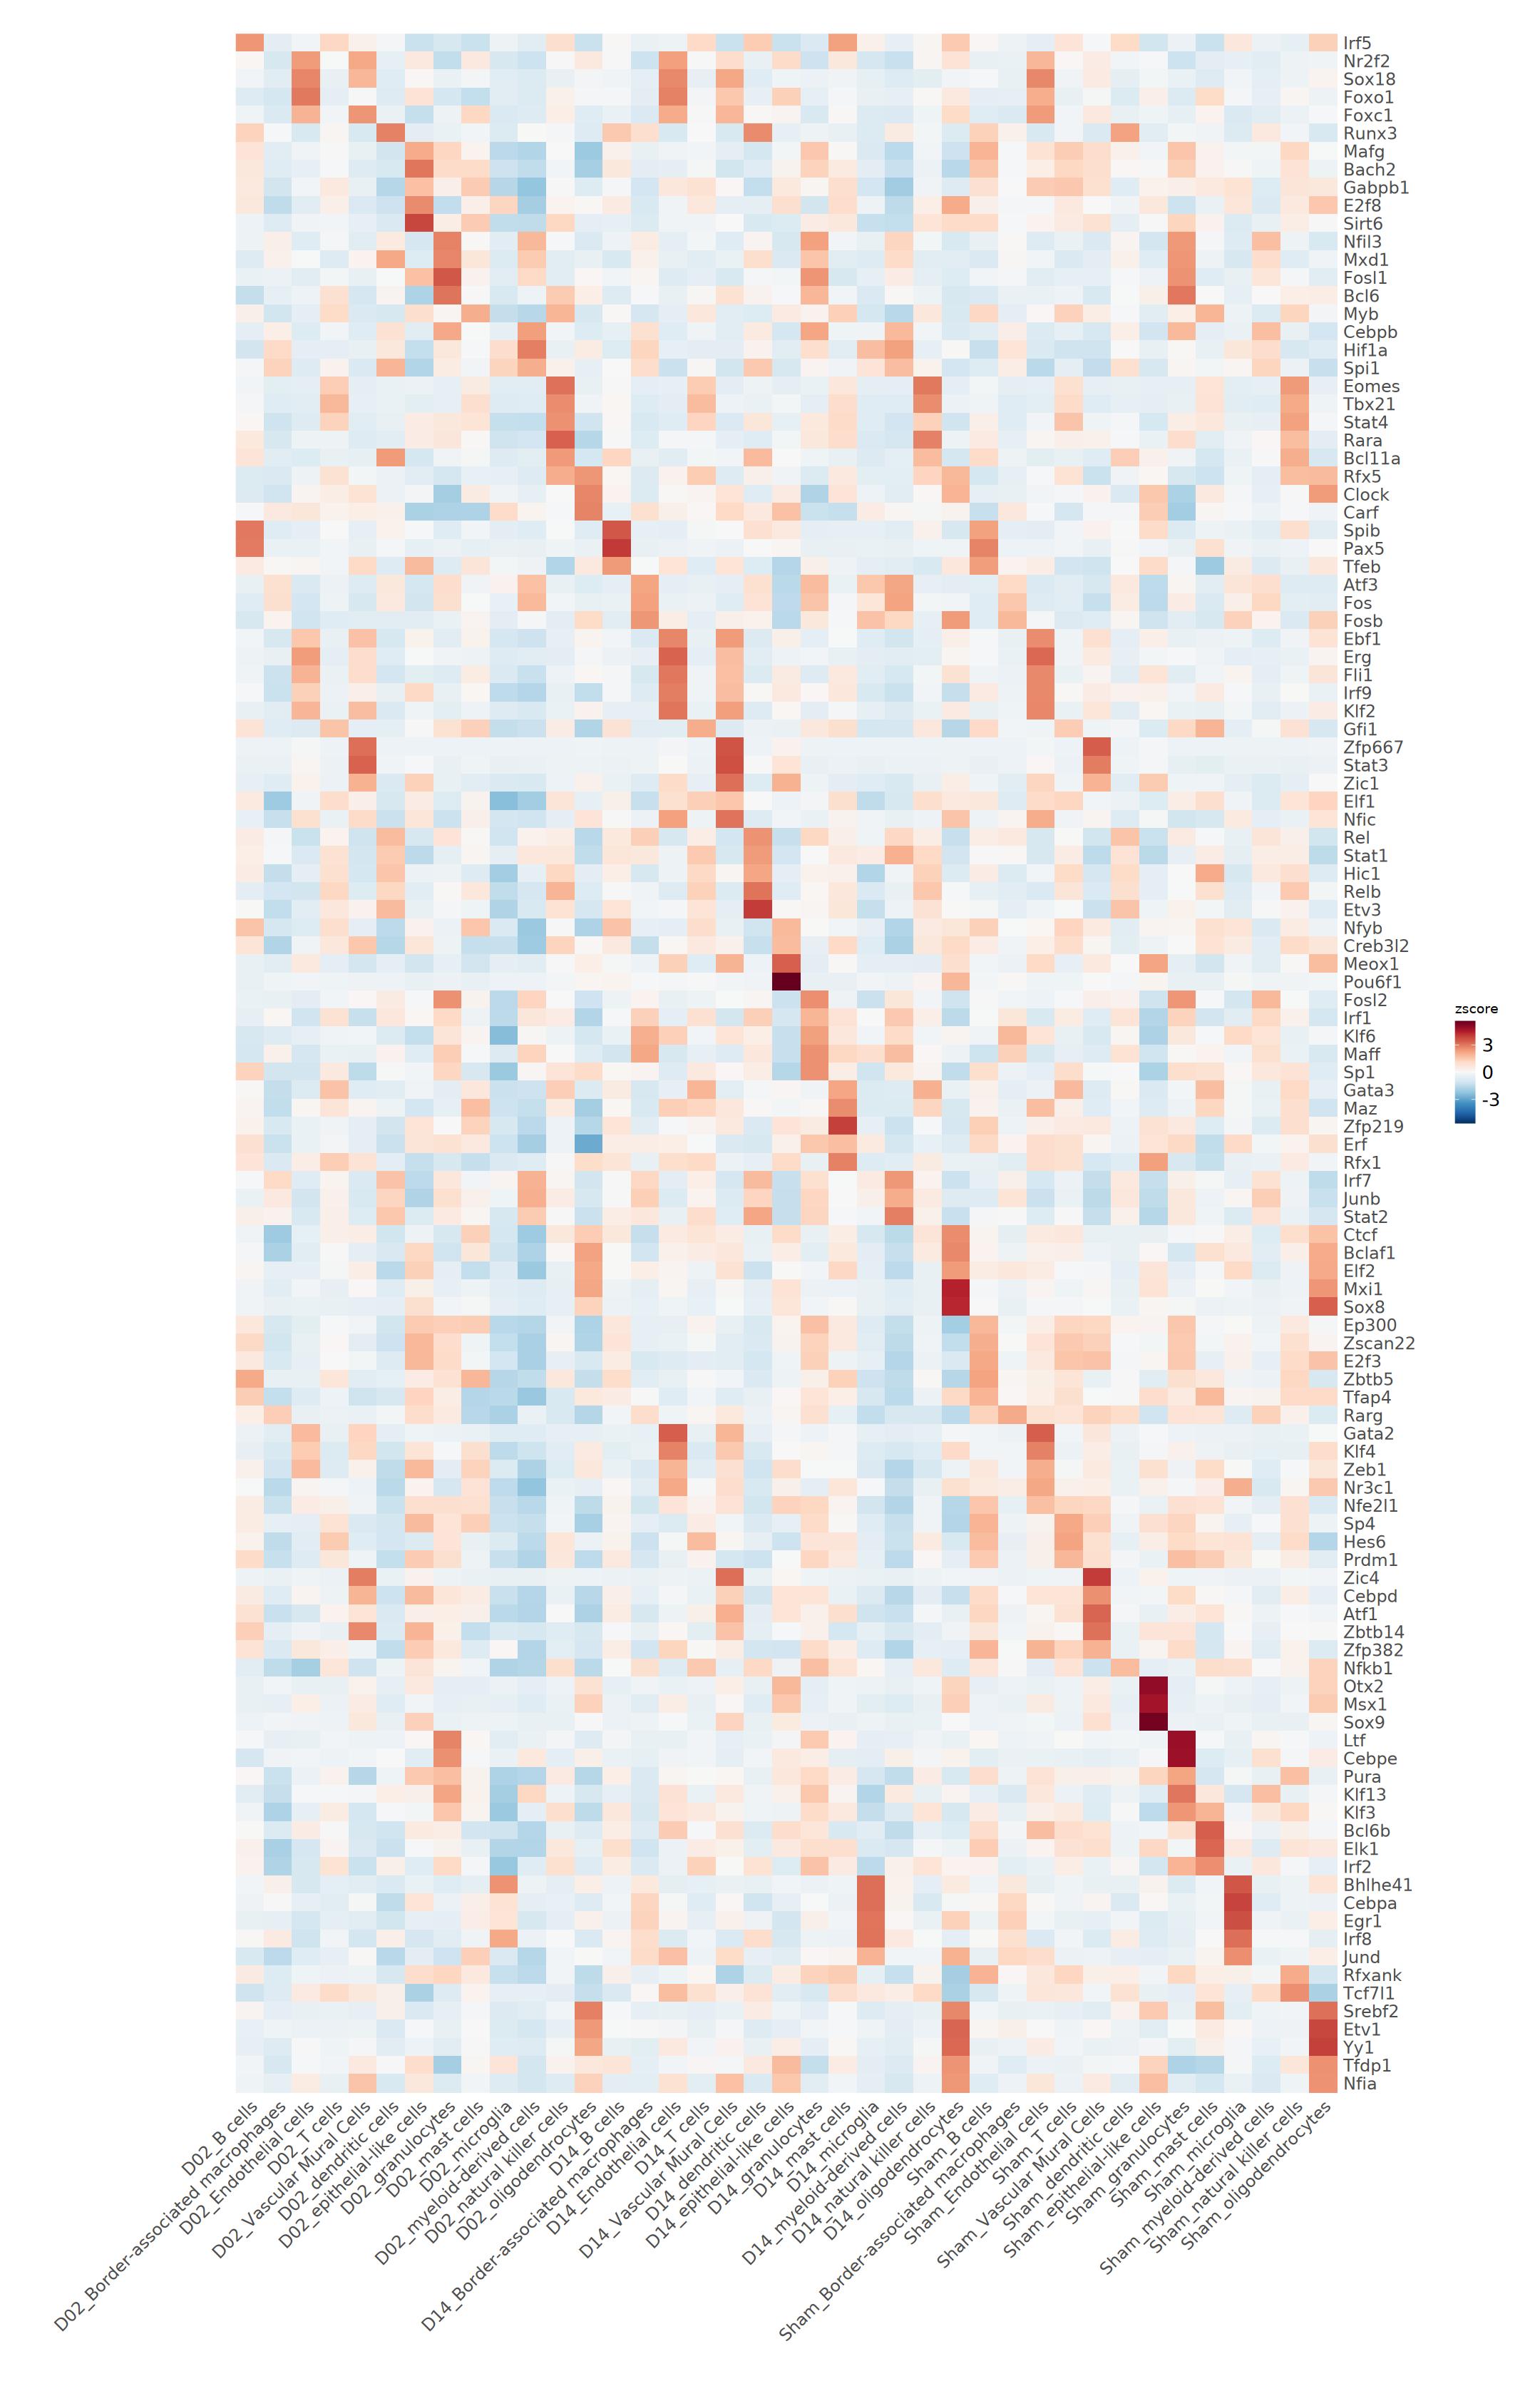

In [21]:
options(repr.plot.width = 18, repr.plot.height = 28) 

Heatmap(tf_zscore, lab_fill = "zscore") + 
 ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 7), "cm")) +
 my_theme

In [22]:
p1 <- 
Heatmap(tf_zscore, lab_fill = "zscore") + 
 ggplot2::theme(plot.margin = ggplot2::unit(c(1, 1, 1, 7), "cm")) +
 my_theme

Using id as id variables



In [23]:
tf_zscore %>% head()

,D02_B cells,D02_Border-associated macrophages,D02_Endothelial cells,D02_T cells,D02_Vascular Mural Cells,D02_dendritic cells,D02_epithelial-like cells,D02_granulocytes,D02_mast cells,D02_microglia,...,Sham_T cells,Sham_Vascular Mural Cells,Sham_dendritic cells,Sham_epithelial-like cells,Sham_granulocytes,Sham_mast cells,Sham_microglia,Sham_myeloid-derived cells,Sham_natural killer cells,Sham_oligodendrocytes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Irf5,2.49651256,-0.60867734,-0.1951268,1.18147507,0.27536310,-0.1068018,-1.25290406,-0.9389622,-1.2529041,-0.3037438,...,0.72232435,-0.05002297,1.1029040,-1.09443937,-0.3628045,-1.2529041,0.6232479,-0.3651439,-0.5133027,1.33513831
Nr2f2,0.08382412,-0.93208997,2.4230503,-0.02424497,2.16705462,-0.5094574,0.56921161,-1.4042496,0.5642498,-0.9203299,...,0.06385514,0.42460150,-0.1657682,-0.05385867,-1.2087988,-0.6034168,-0.5289750,-0.6594585,-0.3047686,-0.22133284
Sox18,-0.21686318,-0.62069737,2.7630836,-0.44962456,1.87624415,-0.7018247,0.06375981,-0.3784462,-0.1630847,-0.6188108,...,-0.22487629,0.50878179,-0.5819833,-0.14016756,-0.3974246,-0.7293875,-0.1882435,-0.5397777,-0.2947717,0.21711950
Foxo1,-0.76051881,-1.01146222,2.9783180,-0.55806805,0.02318409,-0.7586382,0.79787578,-1.0167651,-1.3847846,-0.6656555,...,-0.42598195,-0.08889155,-0.8148601,0.35150397,-0.8133238,1.1005253,-0.1243982,-0.4739133,0.1353354,-0.28847662
Foxc1,-0.26103296,-0.84739420,1.9448962,-0.21219495,2.51710974,-0.3810731,-1.34830221,-0.3033414,1.1738400,-0.8425499,...,-0.21628437,0.59385128,-0.4440278,-0.26716205,-0.5100081,0.2191308,-0.8367630,-0.6564271,-0.3642668,-0.04559121
Runx3,1.26907218,-0.07578407,-0.8884962,0.12393845,-0.90407715,2.8551748,-0.60568752,-0.3838284,-0.2122438,-0.8193598,...,-0.17655209,-0.86254755,2.2793837,-0.63829545,-0.1544220,-0.2541061,-0.7978375,0.5547749,-0.1752150,-0.88964394


In [24]:
tf_zscore %>% colnames() %>% stringr::str_subset(pattern = 'Endo') %>% dput()

c("D02_Endothelial cells", "D14_Endothelial cells", "Sham_Endothelial cells"
)


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


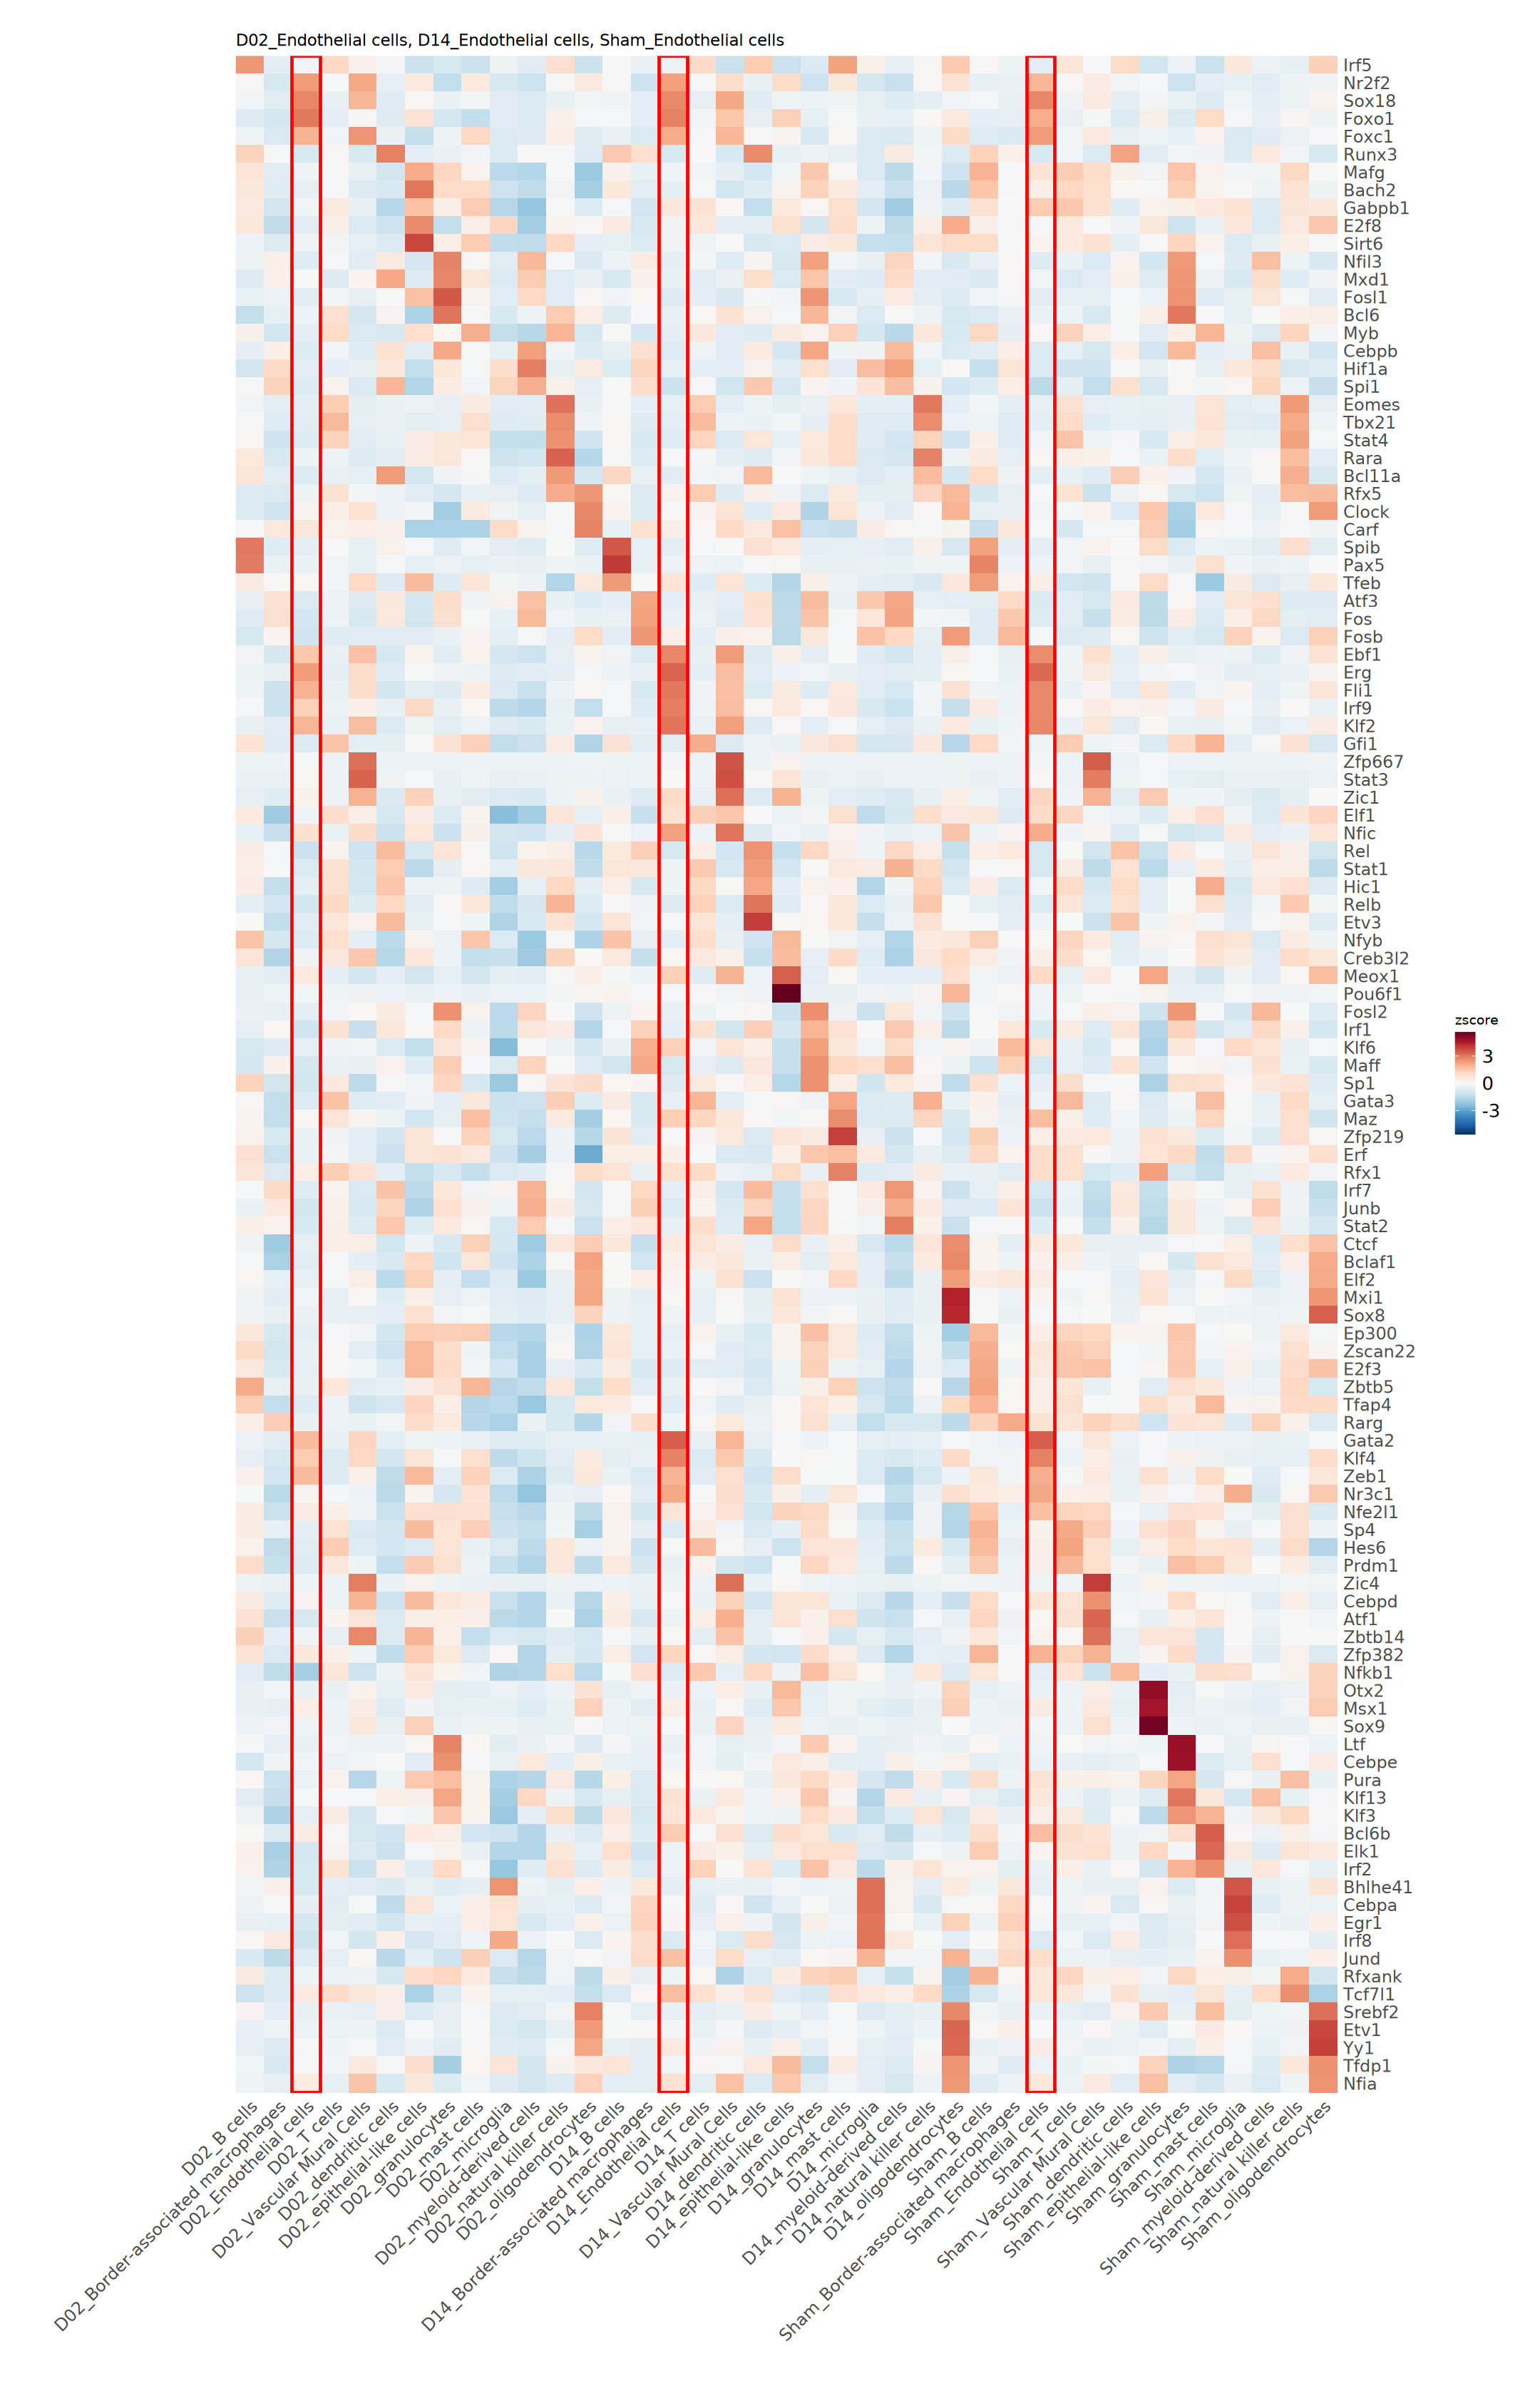

In [25]:
# Ensure that 'variable' matches the original x-axis factor levels
highlight_vars <- c("D02_Endothelial cells", "D14_Endothelial cells", "Sham_Endothelial cells")

p1 + geom_rect(
  data = data.frame(variable = highlight_vars),  
  aes(xmin = which(levels(p1$data$variable) %in% variable) - 0.5, 
      xmax = which(levels(p1$data$variable) %in% variable) + 0.5, 
      ymin = -Inf, ymax = Inf),
  inherit.aes = FALSE,  
  fill = NA, color = "red", size = 1
) + ggtitle(label = paste("D02_Endothelial cells", "D14_Endothelial cells", "Sham_Endothelial cells", sep = ', '))

In [26]:
p1$data %>% head()

,id,variable,value
,<fct>,<fct>,<dbl>
1,Irf5,D02_B cells,2.49651256
2,Nr2f2,D02_B cells,0.08382412
3,Sox18,D02_B cells,-0.21686318
4,Foxo1,D02_B cells,-0.76051881
5,Foxc1,D02_B cells,-0.26103296
6,Runx3,D02_B cells,1.26907218


In [27]:
p1$data %>% group_by(variable) %>% arrange(desc(value))

id,variable,value
<fct>,<fct>,<dbl>
Pou6f1,D14_epithelial-like cells,5.634729
Sox9,Sham_epithelial-like cells,5.438063
Otx2,Sham_epithelial-like cells,4.989984
Ltf,Sham_granulocytes,4.883485
Cebpe,Sham_granulocytes,4.830422
Msx1,Sham_epithelial-like cells,4.726865
Mxi1,D14_oligodendrocytes,4.425070
Sox8,D14_oligodendrocytes,4.339454
Pax5,D14_B cells,4.054607


In [28]:
levels(p1$data$id) %>% rev()

[1] "Irf5"    "Nr2f2"   "Sox18"   "Foxo1"   "Foxc1"   "Runx3"   "Mafg"   
  [8] "Bach2"   "Gabpb1"  "E2f8"    "Sirt6"   "Nfil3"   "Mxd1"    "Fosl1"  
 [15] "Bcl6"    "Myb"     "Cebpb"   "Hif1a"   "Spi1"    "Eomes"   "Tbx21"  
 [22] "Stat4"   "Rara"    "Bcl11a"  "Rfx5"    "Clock"   "Carf"    "Spib"   
 [29] "Pax5"    "Tfeb"    "Atf3"    "Fos"     "Fosb"    "Ebf1"    "Erg"    
 [36] "Fli1"    "Irf9"    "Klf2"    "Gfi1"    "Zfp667"  "Stat3"   "Zic1"   
 [43] "Elf1"    "Nfic"    "Rel"     "Stat1"   "Hic1"    "Relb"    "Etv3"   
 [50] "Nfyb"    "Creb3l2" "Meox1"   "Pou6f1"  "Fosl2"   "Irf1"    "Klf6"   
 [57] "Maff"    "Sp1"     "Gata3"   "Maz"     "Zfp219"  "Erf"     "Rfx1"   
 [64] "Irf7"    "Junb"    "Stat2"   "Ctcf"    "Bclaf1"  "Elf2"    "Mxi1"   
 [71] "Sox8"    "Ep300"   "Zscan22" "E2f3"    "Zbtb5"   "Tfap4"   "Rarg"   
 [78] "Gata2"   "Klf4"    "Zeb1"    "Nr3c1"   "Nfe2l1"  "Sp4"     "Hes6"   
 [85] "Prdm1"   "Zic4"    "Cebpd"   "Atf1"    "Zbtb14"  "Zfp382"  "Nfkb1"  
 [92] "Otx2"    "Msx1"    "Sox9"    "Ltf"     "Cebpe"   "Pura"    "Klf13"  
 [99] "Klf3"    "Bcl6b"   "Elk1"    "Irf2"    "Bhlhe41" "Cebpa"   "Egr1"   
[106] "Irf8"    "Jund"    "Rfxank"  "Tcf7l1"  "Srebf2"  "Etv1"    "Yy1"    
[113] "Tfdp1"   "Nfia"

In [29]:
# genes ranging betwwen two genes:

levels(p1$data$id) %>% rev() %>% { . %in% c('Ebf1', 'Klf2') } %>% which() %>% { rev(levels(p1$data$id))[.[1]:.[2]] }  %>% dput()

c("Ebf1", "Erg", "Fli1", "Irf9", "Klf2")


In [30]:
# genes ranging betwwen two genes:

levels(p1$data$id) %>% rev() %>% { . %in% c('Gata2', 'Nfe2l1') } %>% which() %>% { rev(levels(p1$data$id))[.[1]:.[2]] }  %>% dput()

c("Gata2", "Klf4", "Zeb1", "Nr3c1", "Nfe2l1")


In [37]:
sapply(X = c("Ebf1", "Erg", "Fli1", "Irf9", "Klf2"), function(x) GBonilla_seurat@misc$SCENIC$Regulons[[x]])

$Ebf1
  [1] "4930581F22Rik" "9230116N13Rik" "A430035B10Rik" "A930005H10Rik"
  [5] "Adss"          "Ahctf1"        "Ahi1"          "Alpl"         
  [9] "Amd1"          "Aplp2"         "Arap2"         "Arhgef5"      
 [13] "Arhgef9"       "Arl15"         "Asxl1"         "Atxn1"        
 [17] "B4galt4"       "Bcap29"        "Bend7"         "Braf"         
 [21] "Btg3"          "Cbwd1"         "Ccny"          "Cd2ap"        
 [25] "Cdc16"         "Cdk19"         "Cdk8"          "Cdkn1c"       
 [29] "Cep68"         "Clstn1"        "Col4a3bp"      "Cpsf6"        
 [33] "Crispld1"      "Dag1"          "Dennd5b"       "Dgke"         
 [37] "Dixdc1"        "Dmd"           "Dpp8"          "Dst"          
 [41] "Enpp4"         "Eogt"          "Epn2"          "Ercc6l2"      
 [45] "Erg"           "Fam160a2"      "Fam208a"       "Firre"        
 [49] "Foxp1"         "Foxq1"         "Fut8"          "Fzd3"         
 [53] "Fzd6"          "Gng11"         "Helz"          "Hook3"        
 [57] "Igf1r"         "Ilkap"         "Jmy"           "Kank3"        
 [61] "Kat6b"         "Kdelc2"        "Kif2a"         "Klf9"         
 [65] "Ktn1"          "Lamc1"         "Lhfp"          "Lima1"        
 [69] "Macrod2"       "Maoa"          "Map2"          "Mast4"        
 [73] "Mdn1"          "Mfsd6"         "Mga"           "Mier1"        
 [77] "Mpp7"          "Myh11"         "Myo10"         "Nebl"         
 [81] "Nexn"          "Nfat5"         "Nr4a2"         "Ntn4"         
 [85] "Ocln"          "Orc4"          "Osgin2"        "Pafah1b2"     
 [89] "Pam"           "Pard6g"        "Pcmtd1"        "Pde5a"        
 [93] "Pdp1"          "Pds5b"         "Pi16"          "Pkn2"         
 [97] "Pkp4"          "Plk2"          "Plpp1"         "Ppp3cc"       
[101] "Prickle1"      "Prkg1"         "Rbpms"         "Rcan2"        
[105] "Rcbtb1"        "Rcor3"         "Reck"          "Rmi1"         
[109] "Rps6ka3"       "S1pr1"         "Scd1"          "Sema3c"       
[113] "Sgms1"         "Sgpp2"         "Sh3rf1"        "Slc30a9"      
[117] "Slc36a4"       "Slc6a20a"      "Slc7a1"        "Snai2"        
[121] "Specc1l"       "Srebf2"        "Srgap1"        "Ssx2ip"       
[125] "Stk3"          "Stmn2"         "Stt3b"         "Syne2"        
[129] "Tbl1x"         "Tdrp"          "Tgfb2"         "Tjp1"         
[133] "Tmtc2"         "Top2b"         "Tpd52l1"       "Trnt1"        
[137] "Tsc22d1"       "U2af1"         "Ube2v2"        "Ube3a"        
[141] "Usp9x"         "Vezf1"         "Wdr12"         "Zbtb12"       
[145] "Zfp266"        "Zfp273"        "Zfp367"        "Zfp959"       
[149] "Znrf3"        

$Erg
 [1] "Ankrd28"   "App"       "Arhgap23"  "Arl15"     "Cav1"      "Ccdc141"  
 [7] "Cmtm8"     "Cxcl12"    "Ddc"       "Degs2"     "Edn3"      "Egfl7"    
[13] "Eng"       "Epas1"     "Fbln2"     "Foxc1"     "Foxf2"     "Foxp1"    
[19] "Grrp1"     "Kctd10"    "Kdr"       "Kitl"      "Ltbp4"     "Ly6c1"    
[25] "Mcf2l"     "Mmrn2"     "Ndrg1"     "Nes"       "Nfib"      "Nkd1"     
[31] "Nrarp"     "Osbpl1a"   "Palmd"     "Rgs12"     "Rhobtb2"   "S1pr1"    
[37] "Samd12"    "Serpinb6a" "Slc30a1"   "Sox18"     "Spock2"    "Sptbn1"   
[43] "Tcf7l2"    "Thra"      "Gja5"     

$Fli1
  [1] "1810034E14Rik" "2610008E11Rik" "4930599N23Rik" "5830417I10Rik"
  [5] "6820431F20Rik" "AU040320"      "AW549877"      "Abca3"        
  [9] "Acaca"         "Acbd6"         "Ace"           "Adam10"       
 [13] "Adarb1"        "Adgrl1"        "Adipor1"       "Adrb1"        
 [17] "Afdn"          "Agfg1"         "Ap3m1"         "Apaf1"        
 [21] "Aqr"           "Arhgap21"      "Armcx1"        "Armcx2"       
 [25] "Arrdc3"        "B230219D22Rik" "BC052040"      "Bag2"         
 [29] "Bcr"           "Bfar"          "Bmpr2"         "Bpnt1"        
 [33] "Btbd3"         "C1galt1"       "Carf"          "Cav1"         
 [37] "Ccdc126"       "Ccdc186"       "Ccnd3"         "Cdc73"        
 [41] "Cdk17"         "Cetn2"         "Chd2"          "Chpf2"        
 [45] "Cnksr3"     

In [45]:
sapply(GBonilla_seurat@misc$SCENIC$Regulons, '[', 1) %>% head() # fisrt element of all lists:

Ahr          Arid3a           Arntl            Atf1            Atf3 
         "Aff4"         "Adck5"          "Atf7" "4833420G17Rik" "4930413G21Rik" 
          Bach1 
"4732471J01Rik"

In [46]:
sapply(GBonilla_seurat@misc$SCENIC$Regulons, '[', 3) %>% head() # third element of all lists:

Ahr          Arid3a           Arntl            Atf1            Atf3 
         "Akt2"        "Arid3a"         "Naa15"      "Aldh16a1"           "Abr" 
          Bach1 
"A330023F24Rik"

In [44]:
GBonilla_seurat@misc$SCENIC$Regulons %>% head()

$Ahr
 [1] "Aff4"     "Ahr"      "Akt2"     "Arid5a"   "Atp2a3"   "Cabin1"  
 [7] "Camk2g"   "Cs"       "Dcun1d1"  "Dpf2"     "Dpy19l1"  "Dusp16"  
[13] "Fam133b"  "Gan"      "Haus4"    "Hmgcs1"   "Ipmk"     "Jak2"    
[19] "Larp4"    "Lrrc8d"   "Mier3"    "Naa25"    "Nfkb2"    "Pdcd4"   
[25] "Plekhm3"  "Ppp1cb"   "Raf1"     "Rfx7"     "Senp5"    "Sesn2"   
[31] "Shtn1"    "Snx18"    "Stk17b"   "Supt3"    "Susd6"    "Tap1"    
[37] "Tmem126b" "Tmem131" 

$Arid3a
 [1] "Adck5"         "Arhgap35"      "Arid3a"        "Asnsd1"       
 [5] "Atf7ip"        "Birc6"         "Ccdc77"        "Cdkn2aip"     
 [9] "Clasp2"        "Cped1"         "Dnaja4"        "Dnajb9"       
[13] "E230013L22Rik" "Elmsan1"       "Eya4"          "Fbxl17"       
[17] "Fbxo17"        "Fem1a"         "Fkbp5"         "Fnip1"        
[21] "Hipk2"         "Hook2"         "Hoxb4"         "Irak3"        
[25] "Kbtbd2"        "Macrod2"       "Man1a"         "Map4k5"       
[29] "Myo9a"         "Mysm1"         "Nfix"          "Pdcl"         
[33] "Plec"          "Pnkp"          "Prdm15"        "Prkca"        
[37] "Prok2"         "Prpf8"         "Ripply3"       "Sap18b"       
[41] "Skint3"        "Slc1a1"        "Slc25a30"      "Snx14"        
[45] "Srcap"         "Stamos"        "Strada"        "Tbk1"         
[49] "Tespa1"        "Thada"         "Ttc13"         "Ubr1"         
[53] "Ythdf3"        "Zc3h12c"       "Zfp516"        "Zfp58"        
[57] "Cyp2ab1"      

$Arntl
 [1] "Atf7"    "Btbd7"   "Naa15"   "Nr4a2"   "Pik3c2a" "Pura"    "Sin3a"  
 [8] "Smg1"    "Stat3"   "Ubr5"    "Upf2"   

$Atf1
 [1] "4833420G17Rik" "Aco1"          "Aldh16a1"      "Atf1"         
 [5] "C130026I21Rik" "C330007P06Rik" "Cand2"         "Cd22"         
 [9] "Cd28"          "Cdk5rap2"      "Cdkn2b"        "Csnk2a2"      
[13] "D3Ertd751e"    "Dcaf7"         "Fbxo44"        "Fgfr1op2"     
[17] "Fmnl3"         "Gdf15"         "Gk"            "Glipr1"       
[21] "Gnl3l"         "Golga1"        "Golga7"        "Gpatch2l"     
[25] "Haus5"         "Htatip2"       "Jarid2"        "Kdm6a"        
[29] "Kif26a"        "Krt83"         "Laptm4b"       "Larp7"        
[33] "Lasp1"         "Lifr"          "Magi3"         "Maml3"        
[37] "Mapk6"         "Msantd4"       "Mtmr3"         "Myl9"         
[41] "Ncaph"         "Ngdn"          "Nlk"           "Notch3"       
[45] "Oaz1-ps"       "Phkb"          "Pigt"          "Pold3"        
[49] "Pts"           "Rgs18"         "Rhbdf2"        "Rictor"       
[53] "Rnf24"         "S100pbp"       "Setdb1"        "Slc25a13"     
[57] "Sntb2"         "Snx11"         "Spata6"        "Spred2"       
[61] "Susd3"         "Taf15"         "Tmem161b"      "Tmem201"      
[65] "Tnfsfm13"      "Traf1"         "Trappc8"       "Trim8"        
[69] "Trp53bp2"      "Tshz1"         "Uba6"          "Urb1"         
[73] "Vav3"          "Wdr7"          "Wipi2"         "Wwox"         
[77] "Zbtb17"        "Zc3hc1"        "Zfp691"        "Dlgap5"       
[81] "Lif"           "Pparg"         "Vdr"           "Pkp2"         
[85] "Slc6a9"       

$Atf3
  [1] "4930413G21Rik" "Abcg1"         "Abr"           "Adamts1"      
  [5] "Adar"          "Adssl1"        "Agbl5"         "Akap10"       
  [9] "Akt3"          "Arl4c"         "Arl5c"         "Atf3"         
 [13] "Atp11c"        "Atp13a2"       "B2m"           "B3gnt7"       
 [17] "Bach1"         "Brd2"          "Btg2"          "Casz1"        
 [21] "Ccdc180"       "Ccnl1"         "Ccrl2"         "Cd48"         
 [25] "Cebpb"         "Clint1"        "Clk1"          "Cln8"         
 [29] "Cramp1l"       "Csf1"          "Csf2ra"        "Ctss"         
 [33] "Ddx3x"         "Dusp1"         "Egr1"          "Evi2a"        
 [37] "F9"            "Fam20c"        "Fndc7"         "Foxd2os"      
 [41] "Fth1"          "Gab2"          "Gcfc2"         "Gnptab"       
 [45] "Grb2"          "H3f3b"         "Helb"          "Hif1a"        
 [49] "Hlf"           "Ifrd1"         "Ift140"        "Il21r"        
 [53] "Impact"        "I

In [58]:
Features(GBonilla_seurat) %>% head()

[1] "Ahr"    "Arid3a" "Arntl"  "Atf1"   "Atf3"   "Bach1"

In [59]:
# Default assay is TF activity scores. So use RNA assay rownames as universe:

rownames(GBonilla_seurat@assays$RNA) %>% head()

[1] "0610009B22Rik" "0610009E02Rik" "0610009L18Rik" "0610010F05Rik"
[5] "0610010K14Rik" "0610012G03Rik"

In [60]:
# Enrichment analysis
ebf1_go <- clusterProfiler::enrichGO(GBonilla_seurat@misc$SCENIC$Regulons[['Ebf1']], 
                                            universe =  rownames(GBonilla_seurat@assays$RNA), 
                                            OrgDb = org.Mm.eg.db::org.Mm.eg.db, 
                                            keyType = "SYMBOL", 
                                            ont = "BP")

In [61]:
ebf1_go@result %>% head()

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0007409,GO:0007409,axonogenesis,20/142,334/12903,0.05988024,5.441090,8.674466,6.606043e-10,1.512784e-06,1.361540e-06,Aplp2/Braf/Cd2ap/Dag1/Dixdc1/Dst/Foxp1/Fzd3/Igf1r/Lamc1/Map2/Nexn/Nr4a2/Ntn4/Prickle1/Prkg1/Sema3c/Tgfb2/Top2b/Usp9x,20
GO:0061564,GO:0061564,axon development,20/142,384/12903,0.05208333,4.732614,7.832930,7.326873e-09,8.389269e-06,7.550535e-06,Aplp2/Braf/Cd2ap/Dag1/Dixdc1/Dst/Foxp1/Fzd3/Igf1r/Lamc1/Map2/Nexn/Nr4a2/Ntn4/Prickle1/Prkg1/Sema3c/Tgfb2/Top2b/Usp9x,20
GO:0048667,GO:0048667,cell morphogenesis involved in neuron differentiation,21/142,468/12903,0.04487179,4.077329,7.153266,4.024234e-08,3.071832e-05,2.764719e-05,Aplp2/Braf/Cd2ap/Dag1/Dixdc1/Dst/Foxp1/Fzd3/Igf1r/Lamc1/Map2/Nexn/Nr4a2/Ntn4/Prickle1/Prkg1/Sema3c/Tgfb2/Top2b/Ube3a/Usp9x,21
GO:0035272,GO:0035272,exocrine system development,6/142,40/12903,0.15000000,13.629930,8.438983,4.507834e-06,2.580735e-03,2.322721e-03,Dag1/Igf1r/Ntn4/Sema3c/Snai2/Tgfb2,6
GO:0007435,GO:0007435,salivary gland morphogenesis,5/142,28/12903,0.17857143,16.226107,8.507944,1.205750e-05,5.522336e-03,4.970230e-03,Dag1/Ntn4/Sema3c/Snai2/Tgfb2,5
GO:0010171,GO:0010171,body morphogenesis,6/142,49/12903,0.12244898,11.126473,7.491477,1.514020e-05,5.619217e-03,5.057425e-03,Braf/Crispld1/Dag1/Prickle1/Specc1l/Tgfb2,6


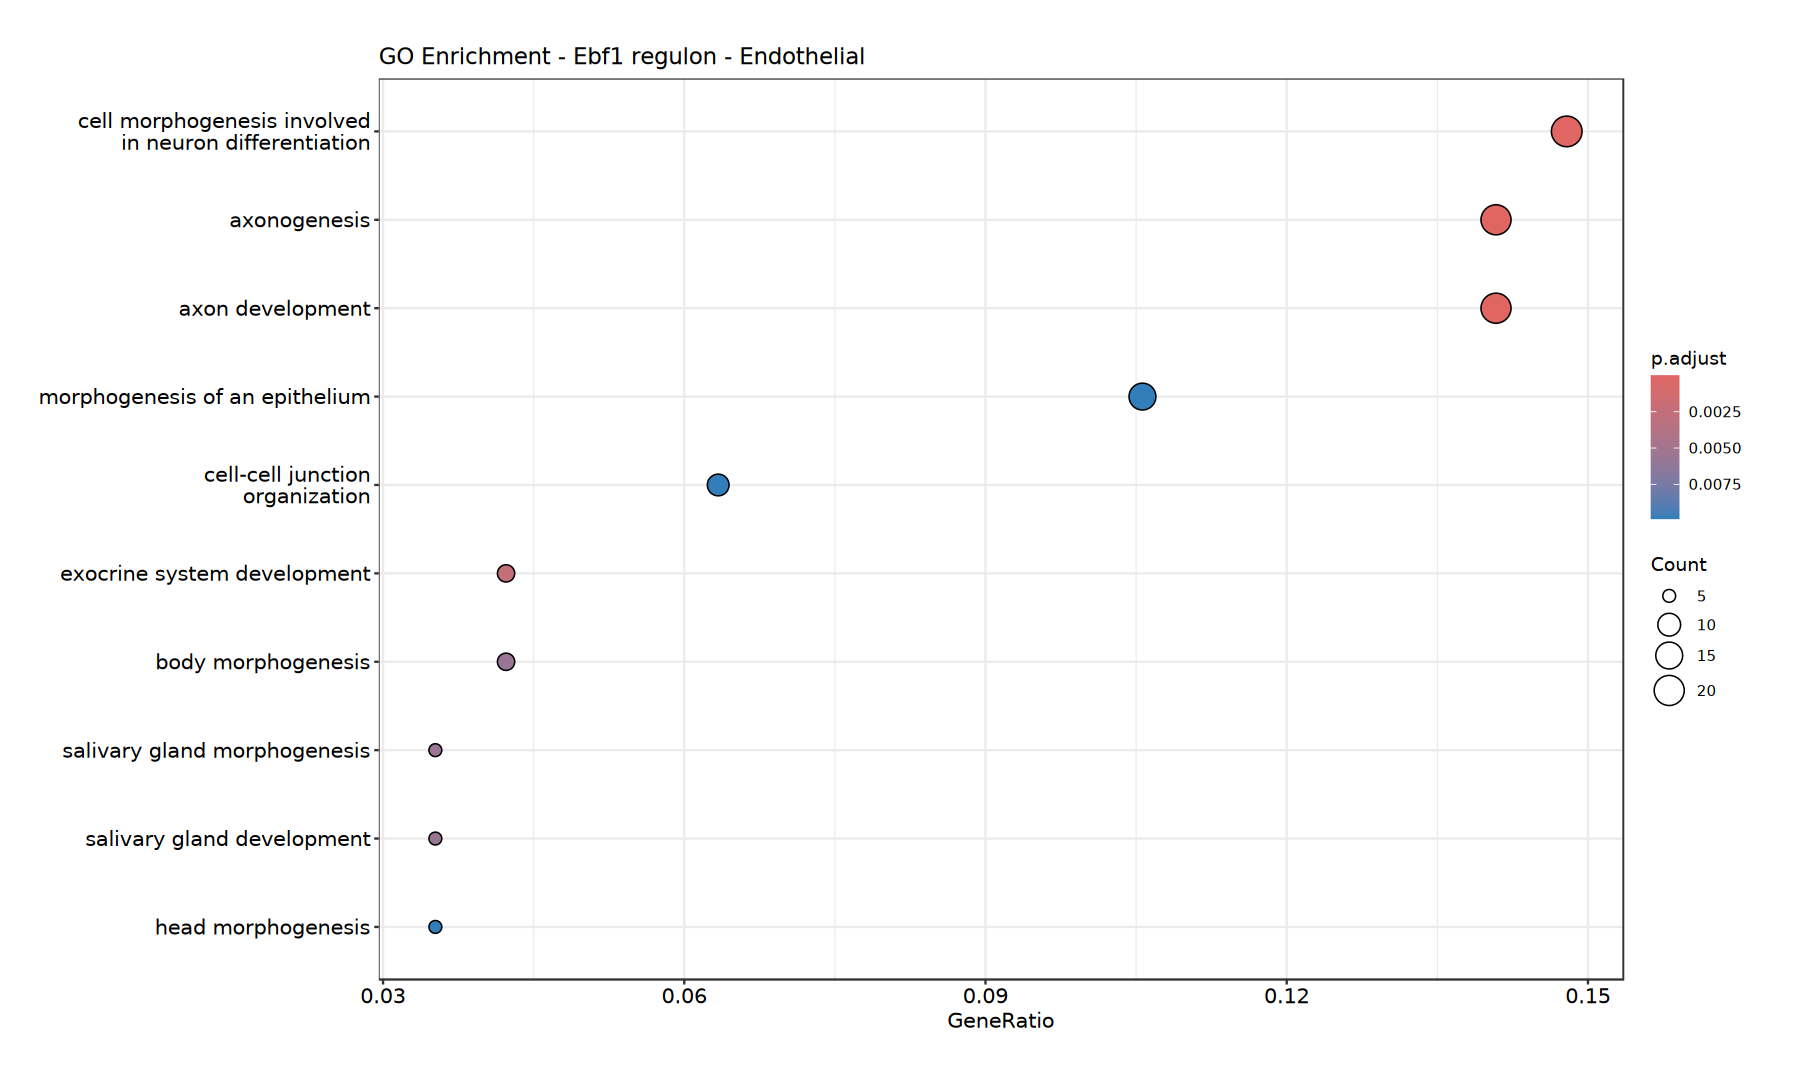

In [62]:
# Visualize

options(repr.plot.width = 15, repr.plot.height = 9) 

clusterProfiler::dotplot(ebf1_go) + ggtitle("GO Enrichment - Ebf1 regulon - Endothelial") + my_margin

In [63]:
all_sig <- sapply(X = c("Ebf1", "Erg", "Fli1", "Irf9", "Klf2"), function(x) GBonilla_seurat@misc$SCENIC$Regulons[[x]]) %>% 
       unlist() %>% unique()

In [64]:
Features(GBonilla_seurat) %>% head()

[1] "Ahr"    "Arid3a" "Arntl"  "Atf1"   "Atf3"   "Bach1"

In [65]:
GBonilla_seurat@assays$RNA %>% rownames() %>% head()

[1] "0610009B22Rik" "0610009E02Rik" "0610009L18Rik" "0610010F05Rik"
[5] "0610010K14Rik" "0610012G03Rik"

In [66]:
# Enrichment analysis
all_sig_go <- clusterProfiler::enrichGO(all_sig, 
                                            universe =  rownames(GBonilla_seurat@assays$RNA), 
                                            OrgDb = org.Mm.eg.db::org.Mm.eg.db, 
                                            keyType = "SYMBOL", 
                                            ont = "BP")

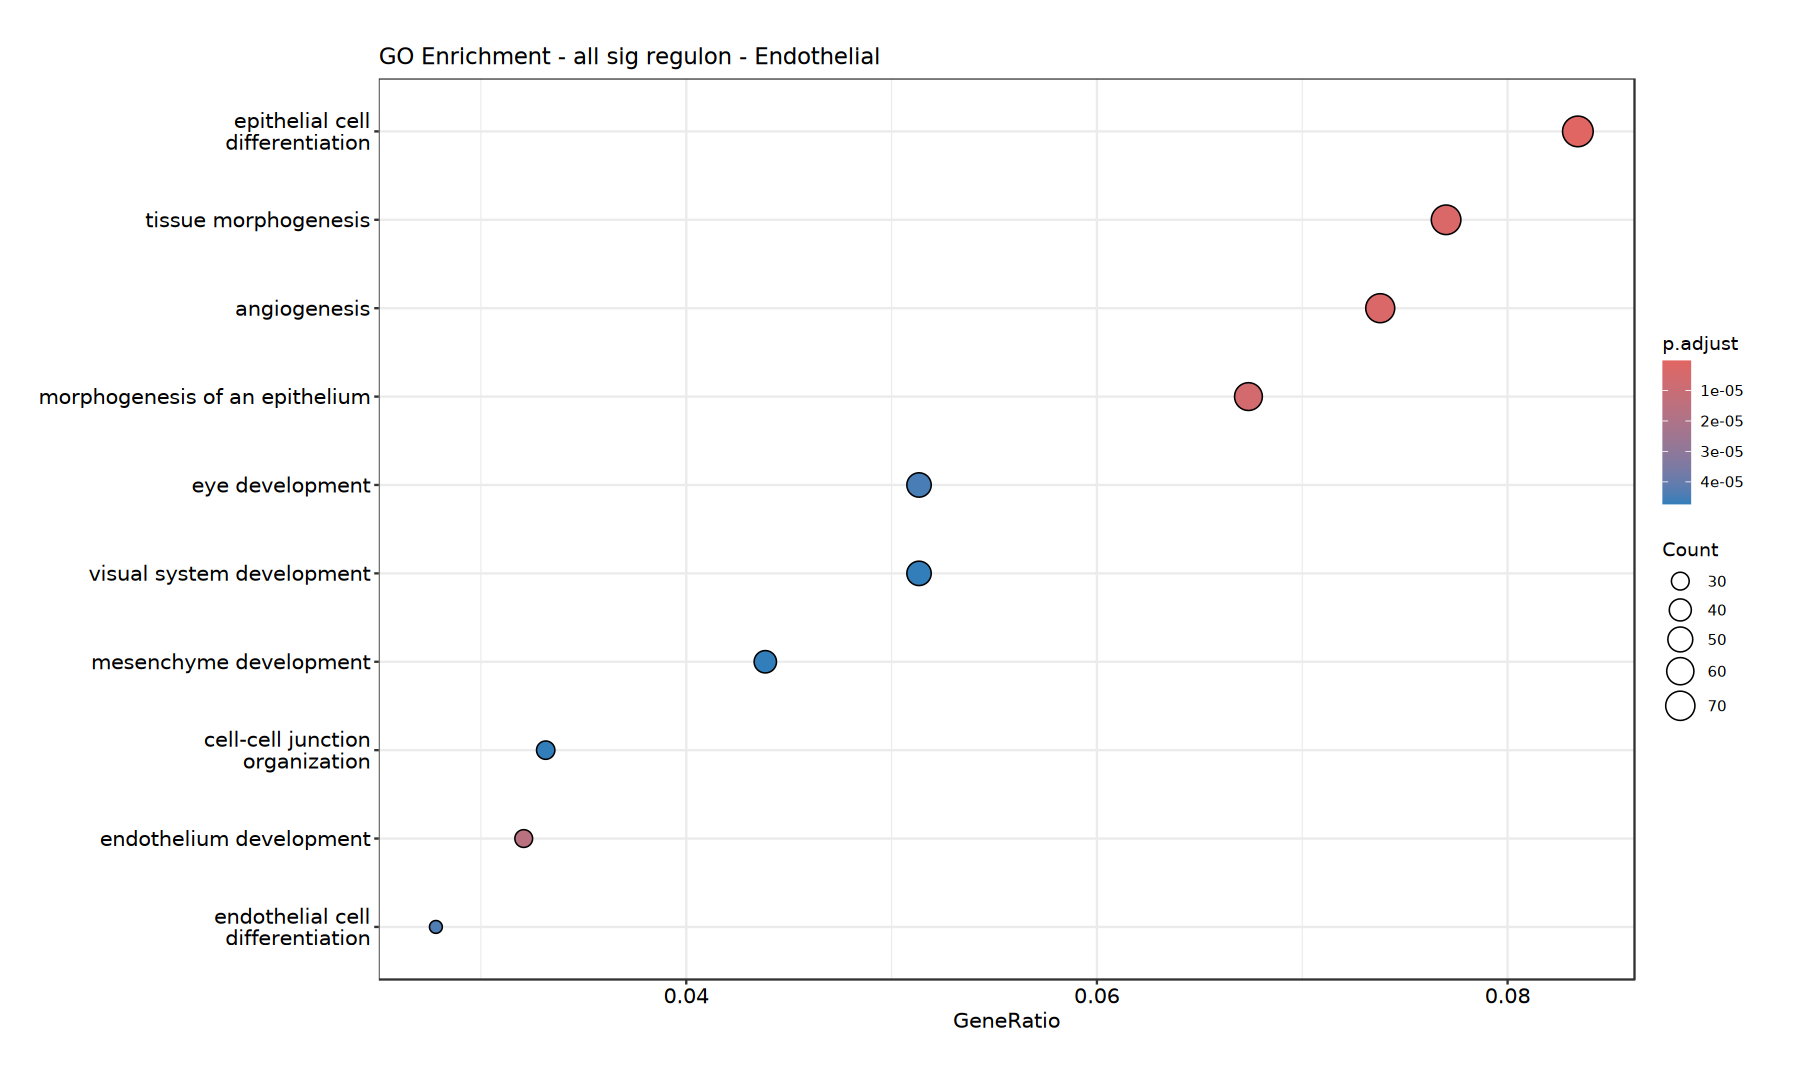

In [67]:
# Visualize

options(repr.plot.width = 15, repr.plot.height = 9) 

clusterProfiler::dotplot(all_sig_go) + ggtitle("GO Enrichment - all sig regulon - Endothelial") + my_margin

In [68]:
go_list <- vector(mode = 'list', length = 5)

In [69]:
for (each_TF in c("Ebf1", "Erg", "Fli1", "Irf9", "Klf2")) {

# Enrichment analysis
go_list[[each_TF]] <- clusterProfiler::enrichGO(GBonilla_seurat@misc$SCENIC$Regulons[[each_TF]], 
                                            universe =  rownames(GBonilla_seurat@assays$RNA), 
                                            OrgDb = org.Mm.eg.db::org.Mm.eg.db, 
                                            keyType = "SYMBOL", 
                                            ont = "BP")

}

In [73]:
go_list$Ebf1@result %>% head()

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0007409,GO:0007409,axonogenesis,20/142,334/12903,0.05988024,5.441090,8.674466,6.606043e-10,1.512784e-06,1.361540e-06,Aplp2/Braf/Cd2ap/Dag1/Dixdc1/Dst/Foxp1/Fzd3/Igf1r/Lamc1/Map2/Nexn/Nr4a2/Ntn4/Prickle1/Prkg1/Sema3c/Tgfb2/Top2b/Usp9x,20
GO:0061564,GO:0061564,axon development,20/142,384/12903,0.05208333,4.732614,7.832930,7.326873e-09,8.389269e-06,7.550535e-06,Aplp2/Braf/Cd2ap/Dag1/Dixdc1/Dst/Foxp1/Fzd3/Igf1r/Lamc1/Map2/Nexn/Nr4a2/Ntn4/Prickle1/Prkg1/Sema3c/Tgfb2/Top2b/Usp9x,20
GO:0048667,GO:0048667,cell morphogenesis involved in neuron differentiation,21/142,468/12903,0.04487179,4.077329,7.153266,4.024234e-08,3.071832e-05,2.764719e-05,Aplp2/Braf/Cd2ap/Dag1/Dixdc1/Dst/Foxp1/Fzd3/Igf1r/Lamc1/Map2/Nexn/Nr4a2/Ntn4/Prickle1/Prkg1/Sema3c/Tgfb2/Top2b/Ube3a/Usp9x,21
GO:0035272,GO:0035272,exocrine system development,6/142,40/12903,0.15000000,13.629930,8.438983,4.507834e-06,2.580735e-03,2.322721e-03,Dag1/Igf1r/Ntn4/Sema3c/Snai2/Tgfb2,6
GO:0007435,GO:0007435,salivary gland morphogenesis,5/142,28/12903,0.17857143,16.226107,8.507944,1.205750e-05,5.522336e-03,4.970230e-03,Dag1/Ntn4/Sema3c/Snai2/Tgfb2,5
GO:0010171,GO:0010171,body morphogenesis,6/142,49/12903,0.12244898,11.126473,7.491477,1.514020e-05,5.619217e-03,5.057425e-03,Braf/Crispld1/Dag1/Prickle1/Specc1l/Tgfb2,6


In [74]:
go_list$Erg@result %>% head()

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0001525,GO:0001525,angiogenesis,12/44,449/12903,0.02672606,7.837416,8.626051,2.087664e-08,3.983263e-05,2.859001e-05,Cav1/Cxcl12/Egfl7/Eng/Epas1/Foxc1/Kctd10/Kdr/Mmrn2/Nrarp/S1pr1/Sox18,12
GO:0050678,GO:0050678,regulation of epithelial cell proliferation,10/44,307/12903,0.03257329,9.552117,8.871106,6.087275e-08,5.807260e-05,4.168181e-05,Cav1/Cxcl12/Egfl7/Eng/Foxp1/Kdr/Mmrn2/Nfib/Nrarp/Tcf7l2,10
GO:0001936,GO:0001936,regulation of endothelial cell proliferation,7/44,117/12903,0.05982906,17.544872,10.515750,1.221529e-07,7.768925e-05,5.576173e-05,Cav1/Cxcl12/Egfl7/Eng/Kdr/Mmrn2/Nrarp,7
GO:0048568,GO:0048568,embryonic organ development,10/44,342/12903,0.02923977,8.574561,8.304427,1.670648e-07,7.968993e-05,5.719772e-05,Eng/Epas1/Foxc1/Foxf2/Kdr/Kitl/Nes/Sox18/Tcf7l2/Gja5,10
GO:0001935,GO:0001935,endothelial cell proliferation,7/44,136/12903,0.05147059,15.093750,9.665022,3.426462e-07,1.128713e-04,8.101374e-05,Cav1/Cxcl12/Egfl7/Eng/Kdr/Mmrn2/Nrarp,7
GO:0050673,GO:0050673,epithelial cell proliferation,10/44,371/12903,0.02695418,7.904313,7.893116,3.549411e-07,1.128713e-04,8.101374e-05,Cav1/Cxcl12/Egfl7/Eng/Foxp1/Kdr/Mmrn2/Nfib/Nrarp/Tcf7l2,10


In [75]:
go_list$Fli1@result %>% head()

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0035330,GO:0035330,regulation of hippo signaling,6/282,34/12903,0.17647059,8.074468,6.174006,8.302193e-05,0.1517957,0.1436139,Arrdc3/Frmd6/Stk3/Strip1/Strn3/Wwc2,6
GO:0031667,GO:0031667,response to nutrient levels,22/282,408/12903,0.05392157,2.467199,4.501498,9.144319e-05,0.1517957,0.1436139,Ace/Adrb1/Apaf1/Bmpr2/Csnk1a1/Foxo1/Ghr/Inhba/Larp1/Map1b/Med1/Mtmr3/Ncoa1/Pik3c2a/Pik3c3/Rela/Rxra/Sh3glb1/Slc2a1/Tcf7l2/Tmem135/Trim32,22
GO:1901654,GO:1901654,response to ketone,12/282,155/12903,0.07741935,3.542347,4.759769,1.516358e-04,0.1678102,0.1587653,Acaca/Ace/Cav1/Foxo1/Ghr/Hnrnpu/Inhba/Larp1/Ncoa1/Rela/Rock2/Ube3a,12
GO:0031669,GO:0031669,cellular response to nutrient levels,14/282,225/12903,0.06222222,2.846998,4.177711,4.324186e-04,0.2861041,0.2706831,Bmpr2/Csnk1a1/Foxo1/Inhba/Med1/Mtmr3/Ncoa1/Pik3c2a/Pik3c3/Rxra/Sh3glb1/Slc2a1/Tcf7l2/Trim32,14
GO:1904385,GO:1904385,cellular response to angiotensin,5/282,30/12903,0.16666667,7.625887,5.430889,4.380500e-04,0.2861041,0.2706831,Ace/Cav1/Inhba/Rela/Rock2,5
GO:0030166,GO:0030166,proteoglycan biosynthetic process,6/282,48/12903,0.12500000,5.719415,4.896423,5.864059e-04,0.2861041,0.2706831,Bmpr2/Chpf2/Fam20b/Hs3st1/Tcf7l2/Xylt2,6


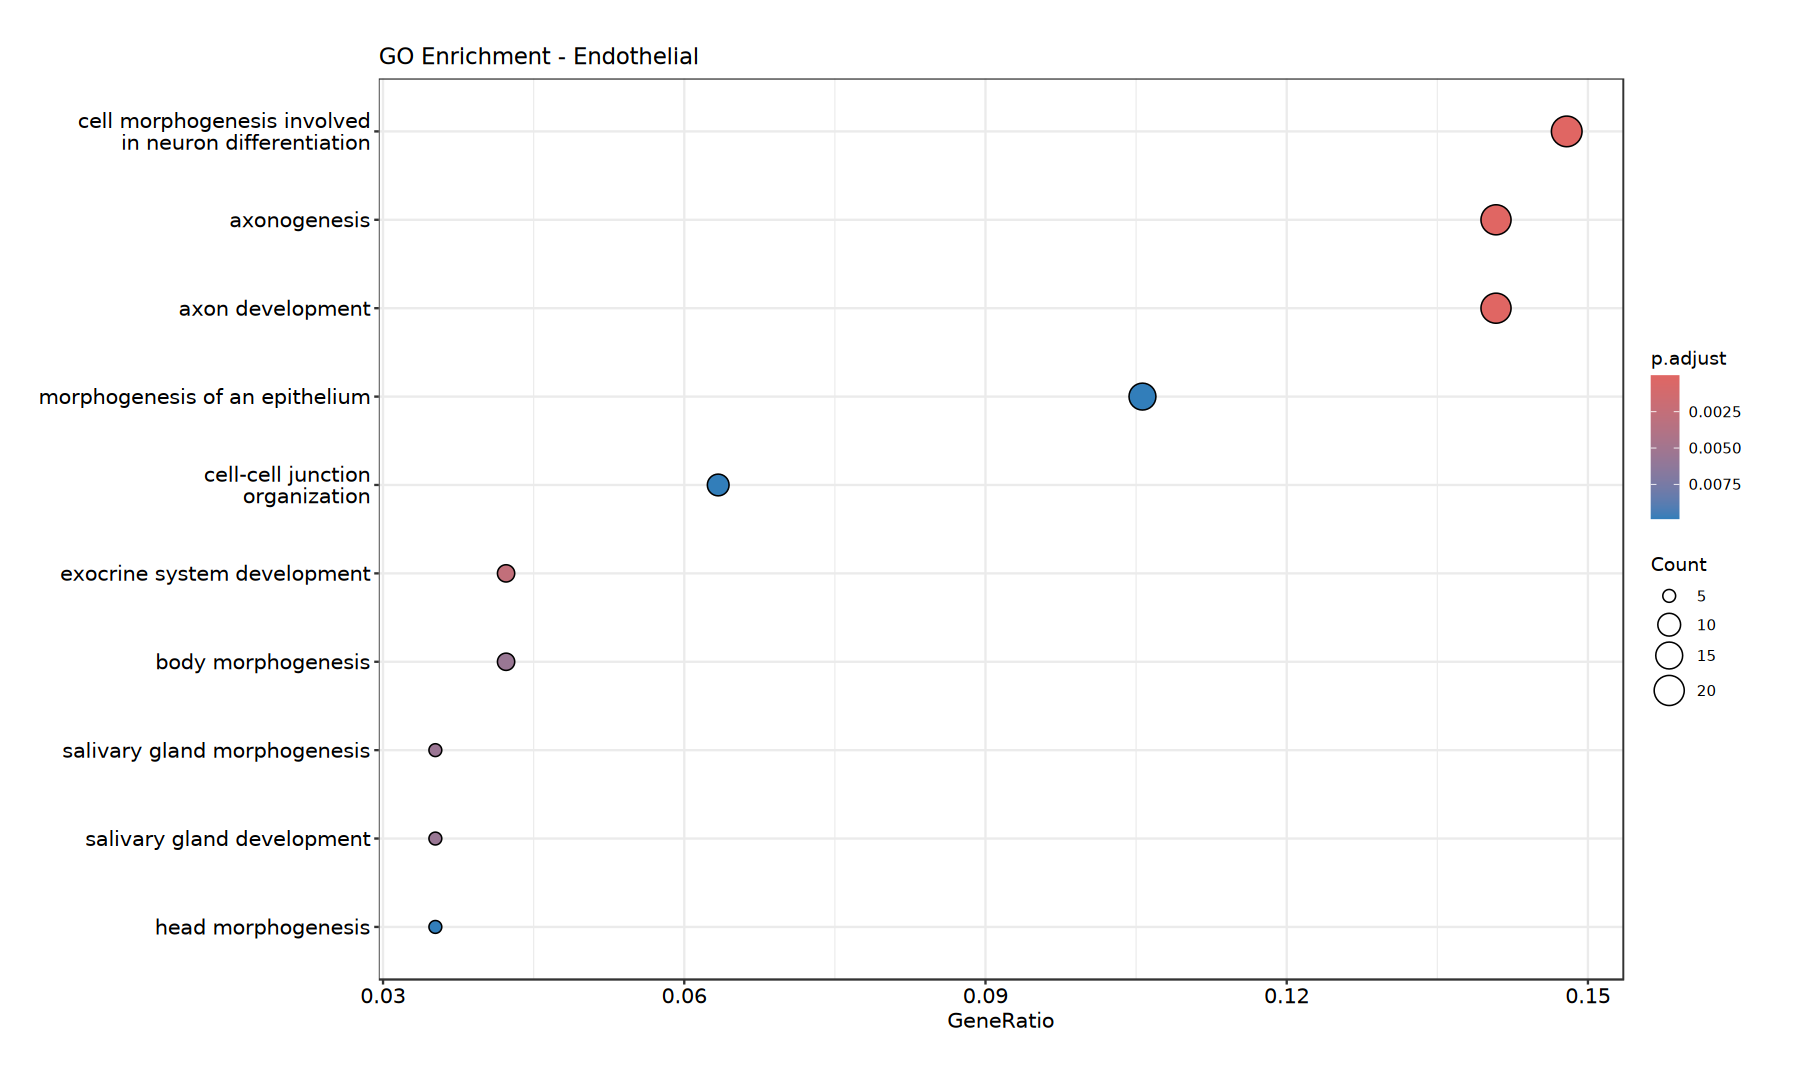

In [76]:
clusterProfiler::dotplot(go_list$Ebf1) + ggtitle("GO Enrichment - Endothelial") + my_margin

In [83]:
go_list %>% names()

[1] ""     ""     ""     ""     ""     "Ebf1" "Erg"  "Fli1" "Irf9" "Klf2"

In [84]:
go_list[['Ebf1']]

#
# over-representation test
#
#...@organism 	 Mus musculus 
#...@ontology 	 BP 
#...@keytype 	 SYMBOL 
#...@gene 	 chr [1:149] "4930581F22Rik" "9230116N13Rik" "A430035B10Rik" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...26 enriched terms found
'data.frame':	26 obs. of  12 variables:
 $ ID            : chr  "GO:0007409" "GO:0061564" "GO:0048667" "GO:0035272" ...
 $ Description   : chr  "axonogenesis" "axon development" "cell morphogenesis involved in neuron differentiation" "exocrine system development" ...
 $ GeneRatio     : chr  "20/142" "20/142" "21/142" "6/142" ...
 $ BgRatio       : chr  "334/12903" "384/12903" "468/12903" "40/12903" ...
 $ RichFactor    : num  0.0599 0.0521 0.0449 0.15 0.1786 ...
 $ FoldEnrichment: num  5.44 4.73 4.08 13.63 16.23 ...
 $ zScore        : num  8.67 7.83 7.15 8.44 8.51 ...
 $ pvalue        : num  6.61e-10 7.33e-09 4.02e-08 4.51e-06 1.21e-05 ...
 $ p.adjust      : num  1.51e-06 8.39e-06 3.07e-05 2.58e-03 5.52e-03 ...
 $ qvalue        : num 

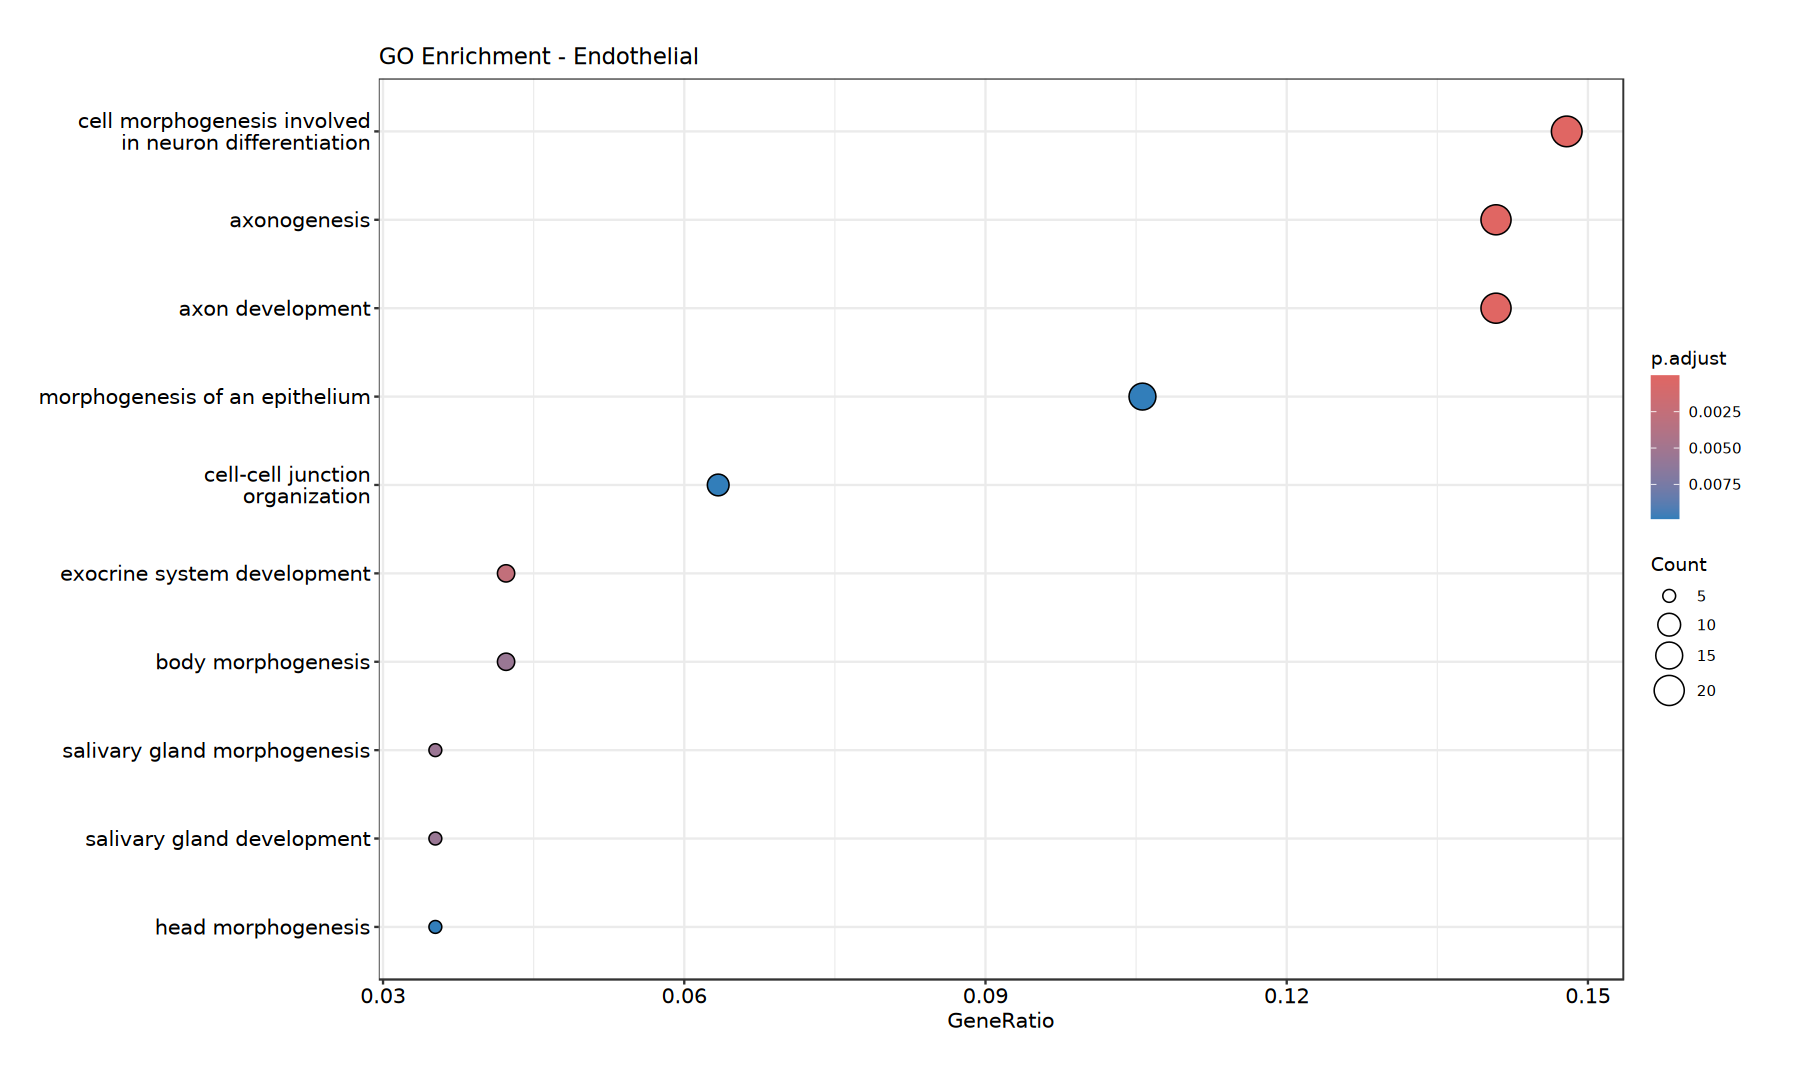

In [87]:
clusterProfiler::dotplot(go_list[['Ebf1']]) + ggtitle("GO Enrichment - Endothelial") + my_margin

In [95]:
go_list[['Erg']]

#
# over-representation test
#
#...@organism 	 Mus musculus 
#...@ontology 	 BP 
#...@keytype 	 SYMBOL 
#...@gene 	 chr [1:45] "Ankrd28" "App" "Arhgap23" "Arl15" "Cav1" "Ccdc141" "Cmtm8" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...255 enriched terms found
'data.frame':	255 obs. of  12 variables:
 $ ID            : chr  "GO:0001525" "GO:0050678" "GO:0001936" "GO:0048568" ...
 $ Description   : chr  "angiogenesis" "regulation of epithelial cell proliferation" "regulation of endothelial cell proliferation" "embryonic organ development" ...
 $ GeneRatio     : chr  "12/44" "10/44" "7/44" "10/44" ...
 $ BgRatio       : chr  "449/12903" "307/12903" "117/12903" "342/12903" ...
 $ RichFactor    : num  0.0267 0.0326 0.0598 0.0292 0.0515 ...
 $ FoldEnrichment: num  7.84 9.55 17.54 8.57 15.09 ...
 $ zScore        : num  8.63 8.87 10.52 8.3 9.67 ...
 $ pvalue        : num  2.09e-08 6.09e-08 1.22e-07 1.67e-07 3.43e-07 ...
 $ p.adjust      : num  3.98e-05 5.81e-05 7.77e-05 7.97e-05 1.13e-

========================================

NO gene sets found for the TF regulons with the following error:

In [89]:
clusterProfiler::dotplot(go_list[['Fli1']]) + ggtitle("GO Enrichment - Endothelial") + my_margin

Warning message in rep(yes, length.out = len):
"'x' is NULL so the result will be NULL"
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr

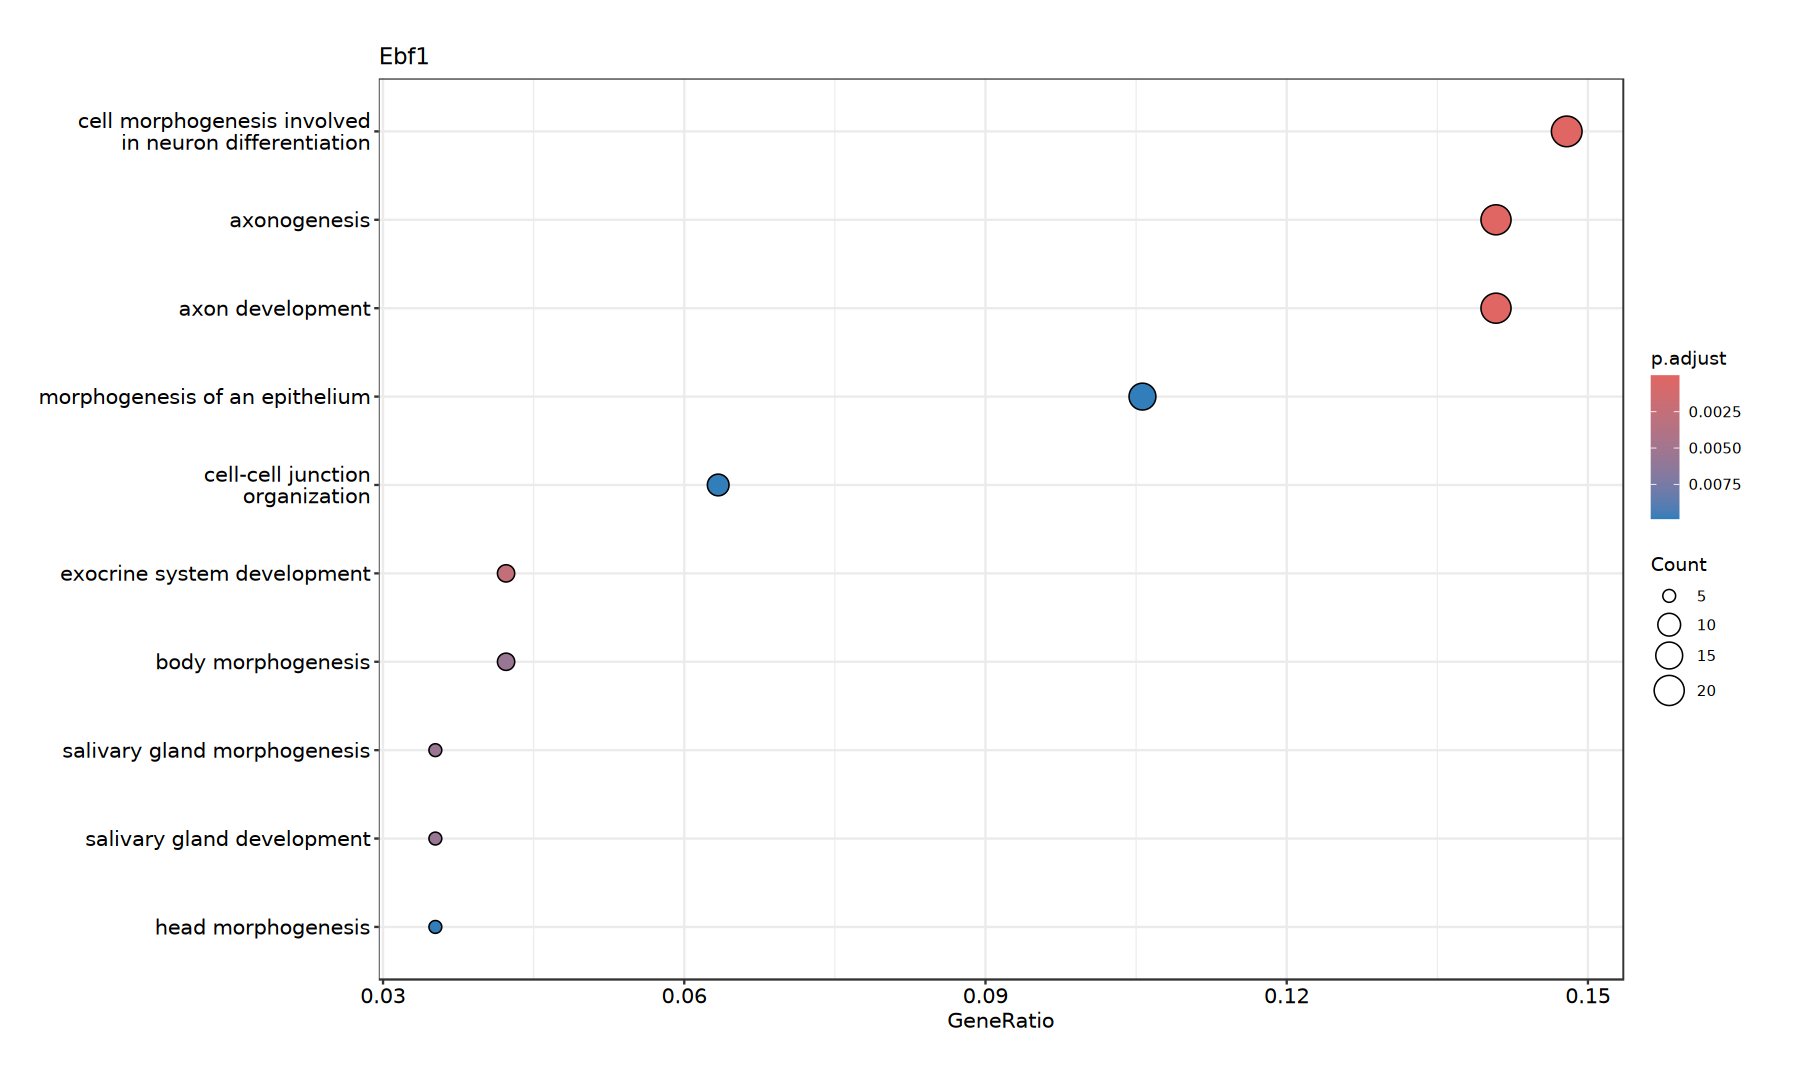

Warning message in rep(yes, length.out = len):
"'x' is NULL so the result will be NULL"


ERROR: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero


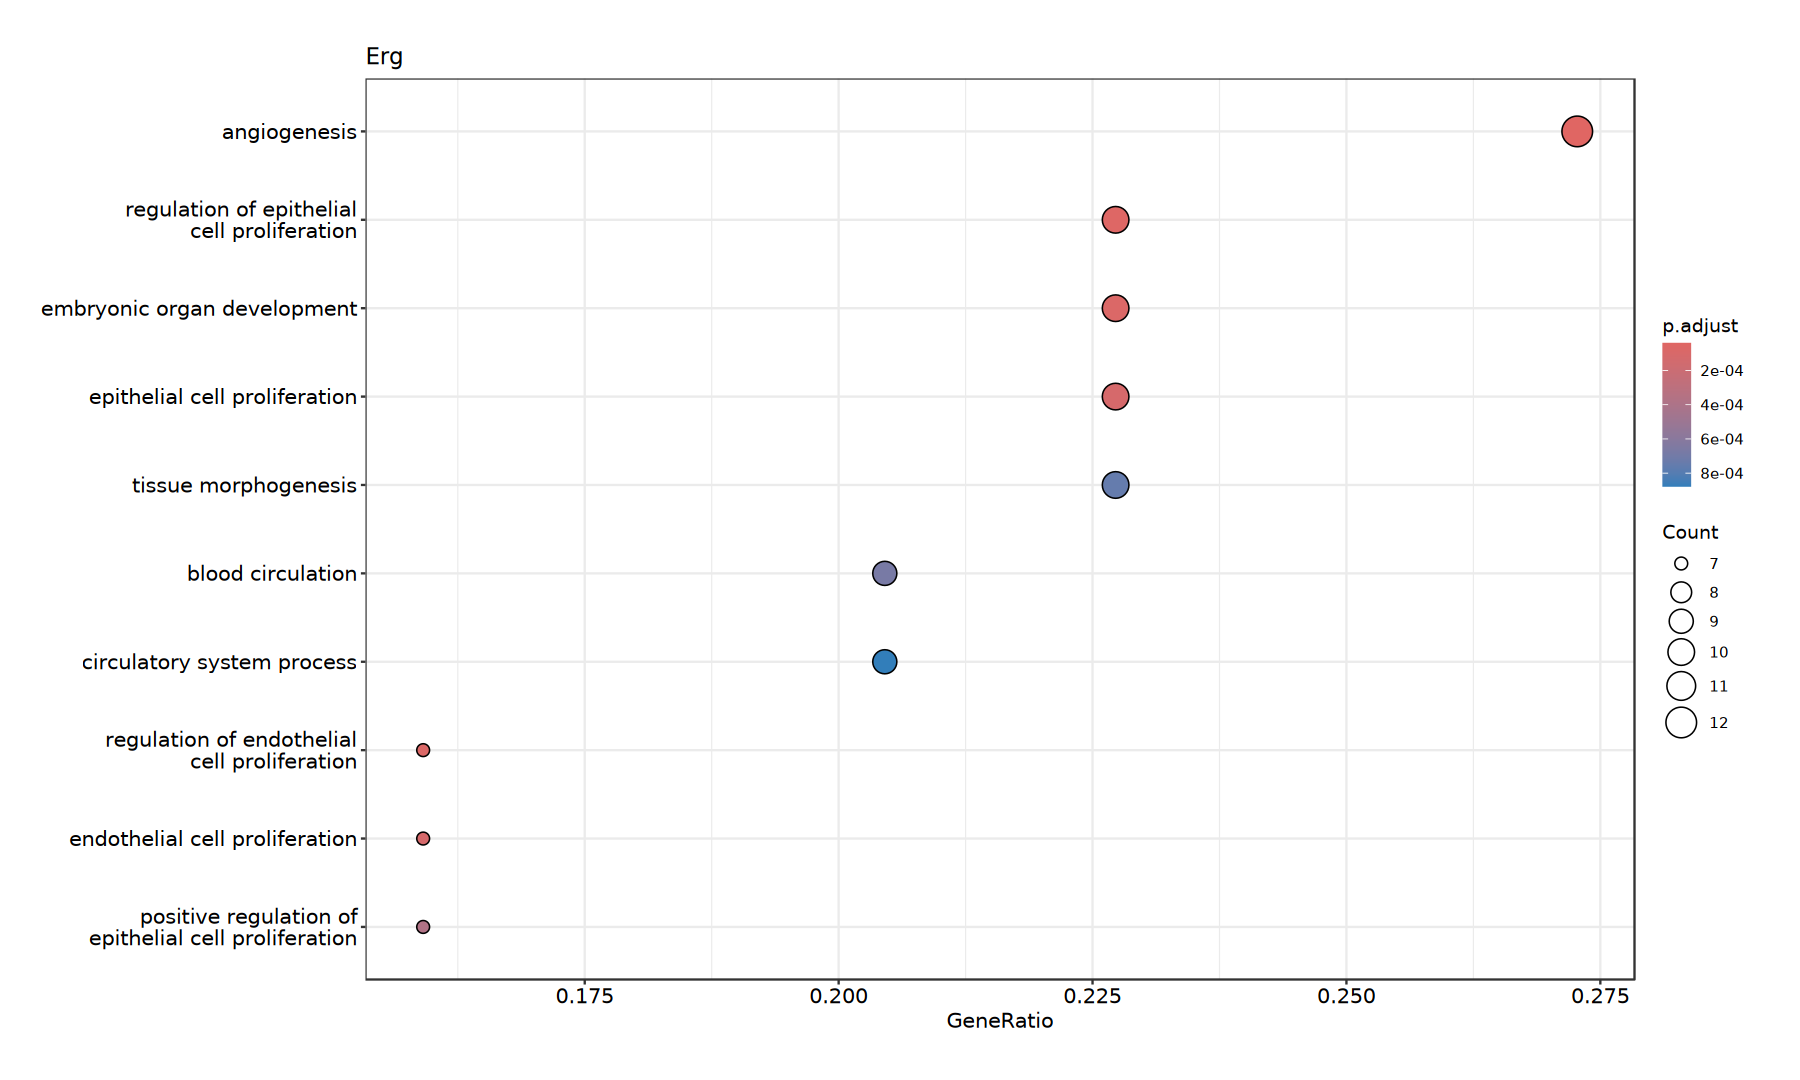

In [96]:
# Visualize

options(repr.plot.width = 15, repr.plot.height = 9) 

for (each_TF in c("Ebf1", "Erg", "Fli1", "Irf9", "Klf2")) {

p1 <- clusterProfiler::dotplot(go_list[[each_TF]]) + ggtitle(each_TF) + my_margin

 print(p1)
    
    }

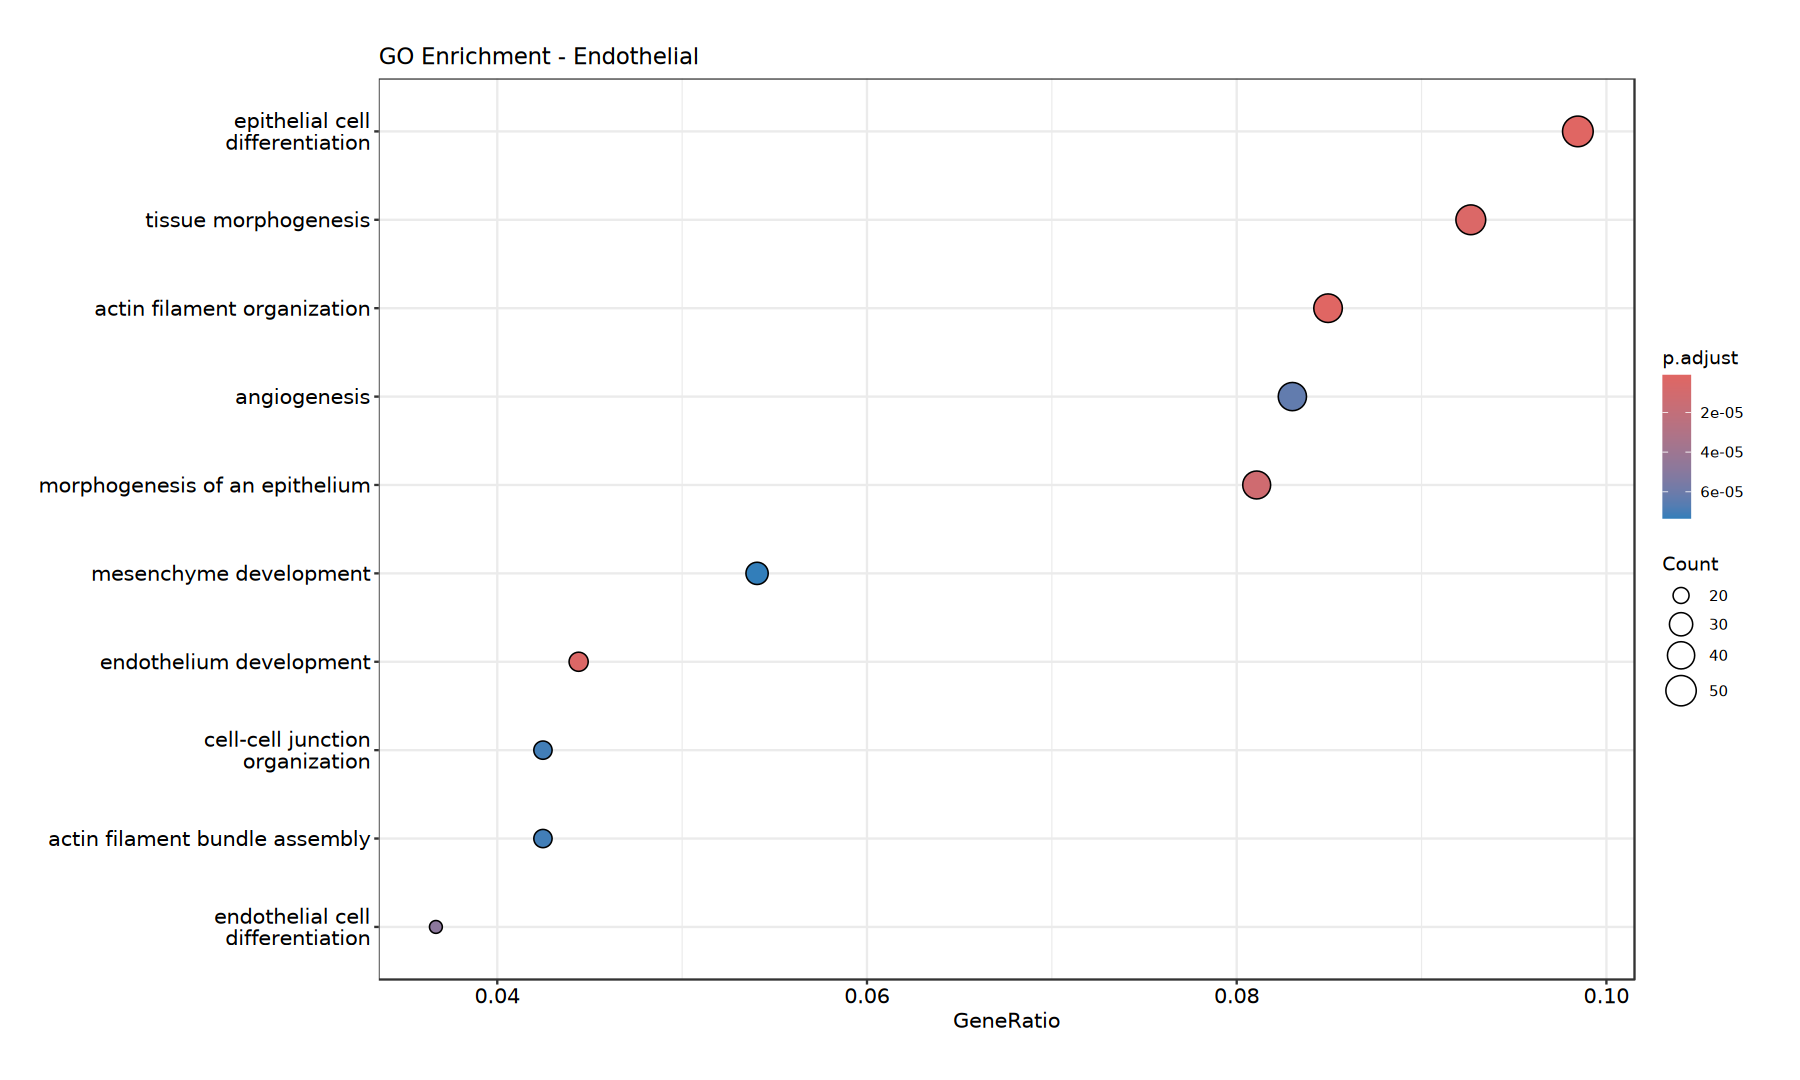

In [97]:
clusterProfiler::dotplot(go_list[['Klf2']]) + ggtitle("GO Enrichment - Endothelial") + my_margin

In [98]:
go_list_2 <- vector(mode = 'list', length = 5)

In [99]:
for (each_TF in c("Gata2", "Klf4", "Zeb1", "Nr3c1", "Nfe2l1")) {

# Enrichment analysis
go_list_2[[each_TF]] <- clusterProfiler::enrichGO(GBonilla_seurat@misc$SCENIC$Regulons[[each_TF]], 
                                            universe =  rownames(GBonilla_seurat@assays$RNA), 
                                            OrgDb = org.Mm.eg.db::org.Mm.eg.db, 
                                            keyType = "SYMBOL", 
                                            ont = "BP")

}

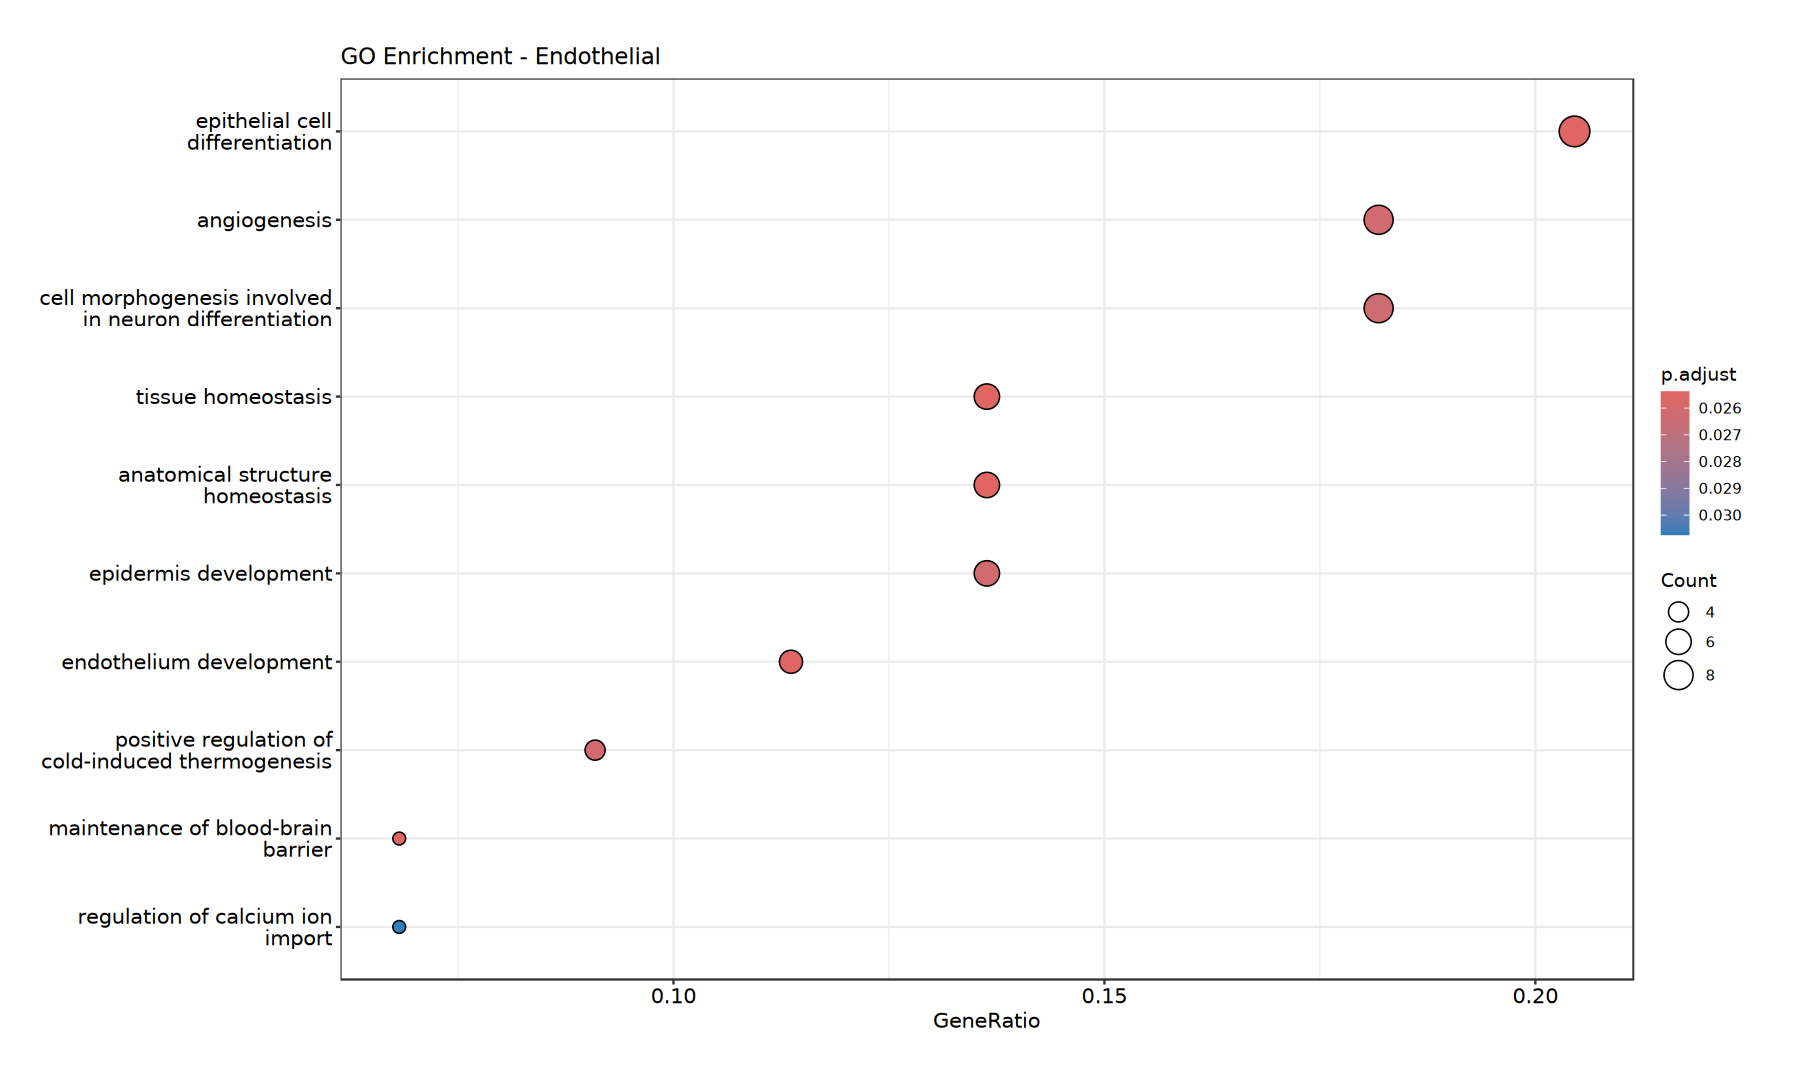

In [100]:
clusterProfiler::dotplot(go_list_2$Gata2) + ggtitle("GO Enrichment - Endothelial") + my_margin

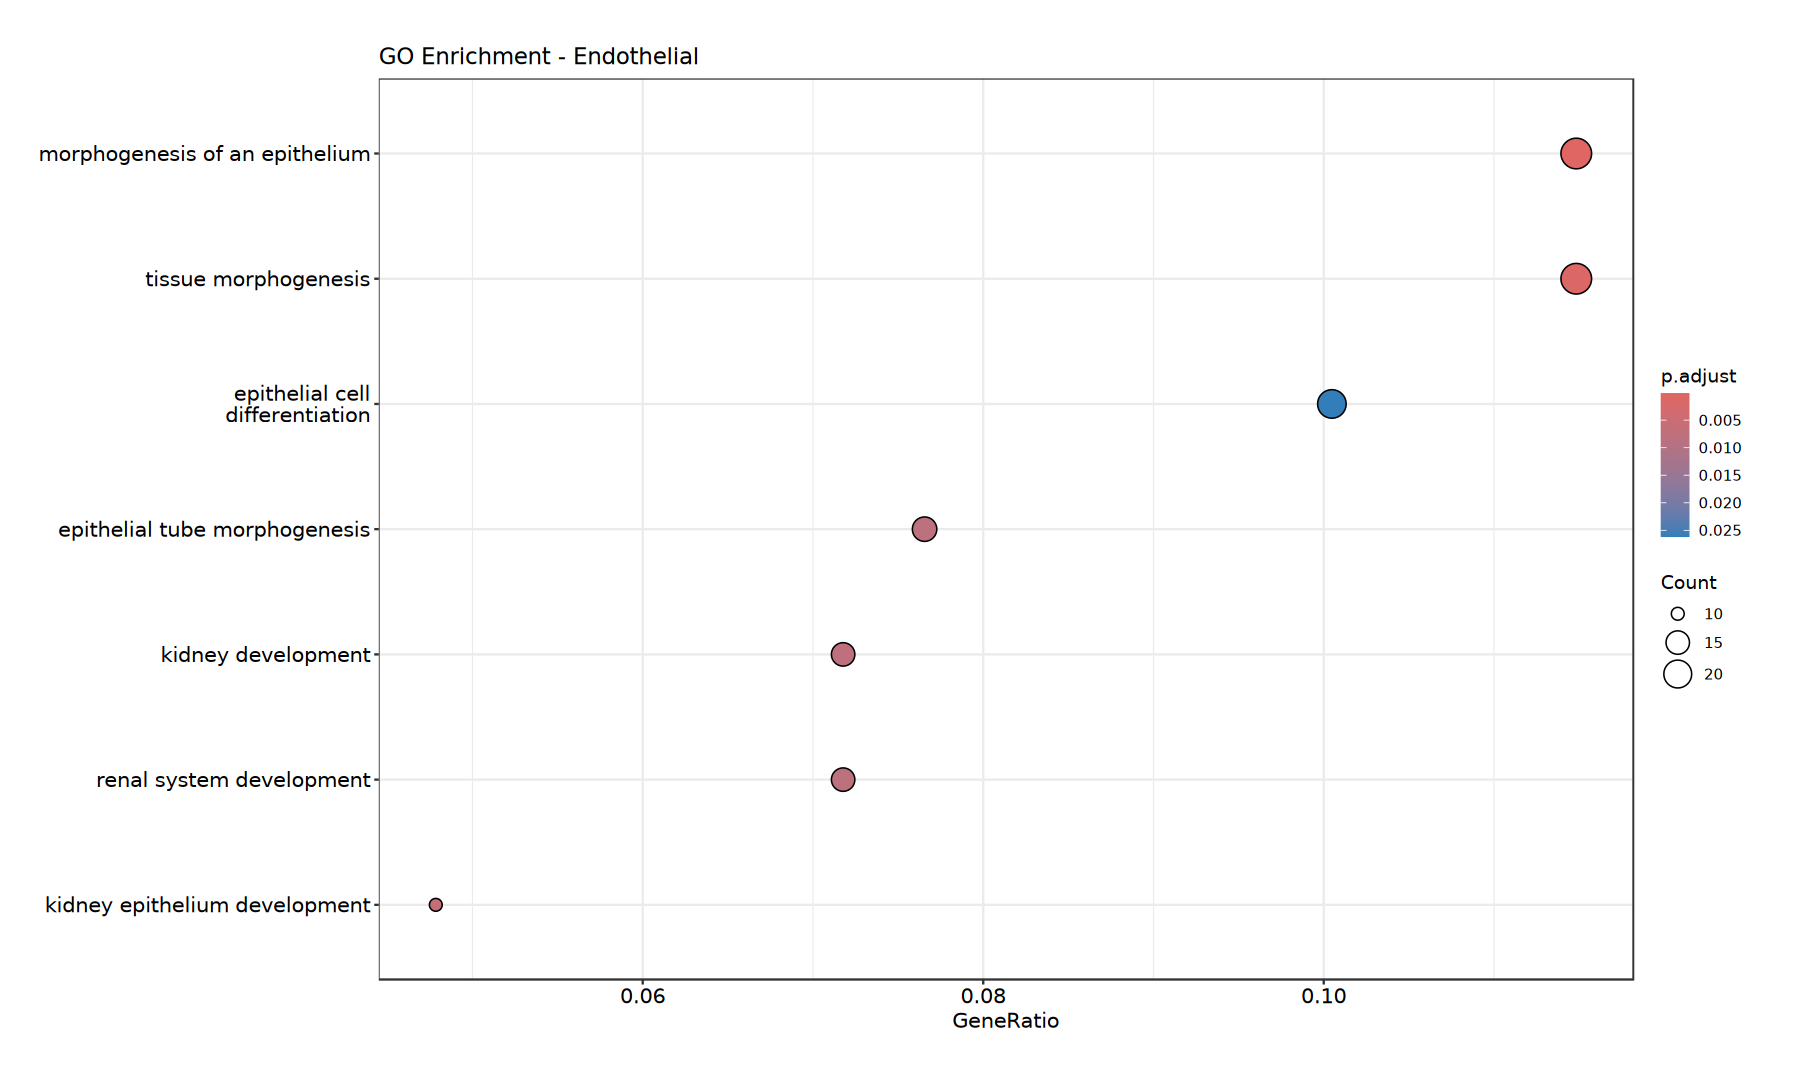

In [101]:
clusterProfiler::dotplot(go_list_2$Klf4) + ggtitle("GO Enrichment - Endothelial") + my_margin

========================================

NO gene sets found for the genes, below:

In [102]:
clusterProfiler::dotplot(go_list_2$Nfe2l1) + ggtitle("GO Enrichment - Endothelial") + my_margin

Warning message in rep(yes, length.out = len):
"'x' is NULL so the result will be NULL"
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr

In [103]:
clusterProfiler::dotplot(go_list_2$Nr3c1) + ggtitle("GO Enrichment - Endothelial") + my_margin

Warning message in rep(yes, length.out = len):
"'x' is NULL so the result will be NULL"
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr

In [104]:
clusterProfiler::dotplot(go_list_2$Zeb1) + ggtitle("GO Enrichment - Endothelial") + my_margin

Warning message in rep(yes, length.out = len):
"'x' is NULL so the result will be NULL"
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr

In [105]:
GBonilla_seurat$treatment_and_cell_types %>% table()

.
                       D02_B cells  D02_Border-associated macrophages 
                                70                                357 
             D02_Endothelial cells                        D02_T cells 
                              2491                                215 
          D02_Vascular Mural Cells                D02_dendritic cells 
                                35                               1282 
         D02_epithelial-like cells                   D02_granulocytes 
                                 7                                350 
                    D02_mast cells                      D02_microglia 
                                 8                               2693 
         D02_myeloid-derived cells           D02_natural killer cells 
                              7225                                 73 
              D02_oligodendrocytes                        D14_B cells 
                                17                                141 
 D14

In [106]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mj1kw87qd3m1q7r4844adkn5hifx8k6a-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C          LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C.UTF-8
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] rlang_1.1.4            reshape2_1.4.4         mosaic_1.9.1          
 [4] mosaicData_0.20.4      ggformula_0.12.0       Matrix_1.7-1          
 [7] lattice_0.22-6         RColorBrewer_1.1-3     viridis_0.6.5         
[10] viridisLite_0.4.2      scales_1.3.0           ggplot2_3.5.